In [115]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns
import missingno as msno
import requests
import dataframe_image
import prince
from sklearn.neighbors import NearestNeighbors
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score, silhouette_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder, LabelEncoder
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans, AffinityPropagation, AgglomerativeClustering, HDBSCAN, Birch, OPTICS
import re

# Data Wrangling
Para nuestro proyecto escogimos uno de los sets de datos sugeridos al inicio del curso.
Vamos a comenzar por limpiar este set de datos.

In [48]:
url = 'https://docs.google.com/spreadsheets/d/153Cg5k2euX7rpeg2DUao5Mcy-ZCzvgFx/edit?usp=drive_link&ouid=114136659933018459305&rtpof=true&sd=true'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
netflix_raw = pd.read_excel(path)
netflix_raw.head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1.0,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2.0,18,2021.0,NaN,NaN,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,tt7255502,The Kominsky Method,3.0,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama",0,"['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,tt0108778,Friends,4.0,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance",0,"['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,tt9251798,Ragnarok,5.0,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


In [49]:
#Los popular_rank a partir del registro 994 son representados como floats y no como número enteros superiores a mil.
#Por lo tanto los hay que multiplicar por 1000.
netflix_raw[netflix_raw['popular_rank'] == 1]

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1.0,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
994,tt8361028,Cam,1.0,NaN,2018.0,NaN,NaN,94,movie,United States,English,"Alice, an ambitious camgirl, wakes up one day ...",In Daniel Goldhaber and Isa Mazzei's paranoid ...,5.9,28139.0,"Drama,Horror,Mystery",0,"['Madeline Brewer', 'Patch Darragh', 'Melora W...",https://m.media-amazon.com/images/M/MV5BYWYwZD...


In [50]:
netflix_raw.iloc[994:,2] *= 1000

In [51]:
#ahora tenemos solo un registro con un popular_rank de 1.
netflix_raw[netflix_raw['popular_rank'] == 1]

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1.0,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...


In [52]:
#Ahora vamos a mirar los valores nulos
netflix_raw.isnull().sum()

imdb_id             0
title               0
popular_rank        0
certificate      4599
startYear         515
endYear          5882
episodes         4704
runtime             2
type                2
orign_country       0
language            0
plot              399
summary             0
rating           1008
numVotes         1008
genres              2
isAdult             0
cast                0
image_url           0
dtype: int64

In [53]:
netflix_raw.isnull().mean()

imdb_id          0.000000
title            0.000000
popular_rank     0.000000
certificate      0.656250
startYear        0.073487
endYear          0.839326
episodes         0.671233
runtime          0.000285
type             0.000285
orign_country    0.000000
language         0.000000
plot             0.056935
summary          0.000000
rating           0.143836
numVotes         0.143836
genres           0.000285
isAdult          0.000000
cast             0.000000
image_url        0.000000
dtype: float64

<AxesSubplot: >

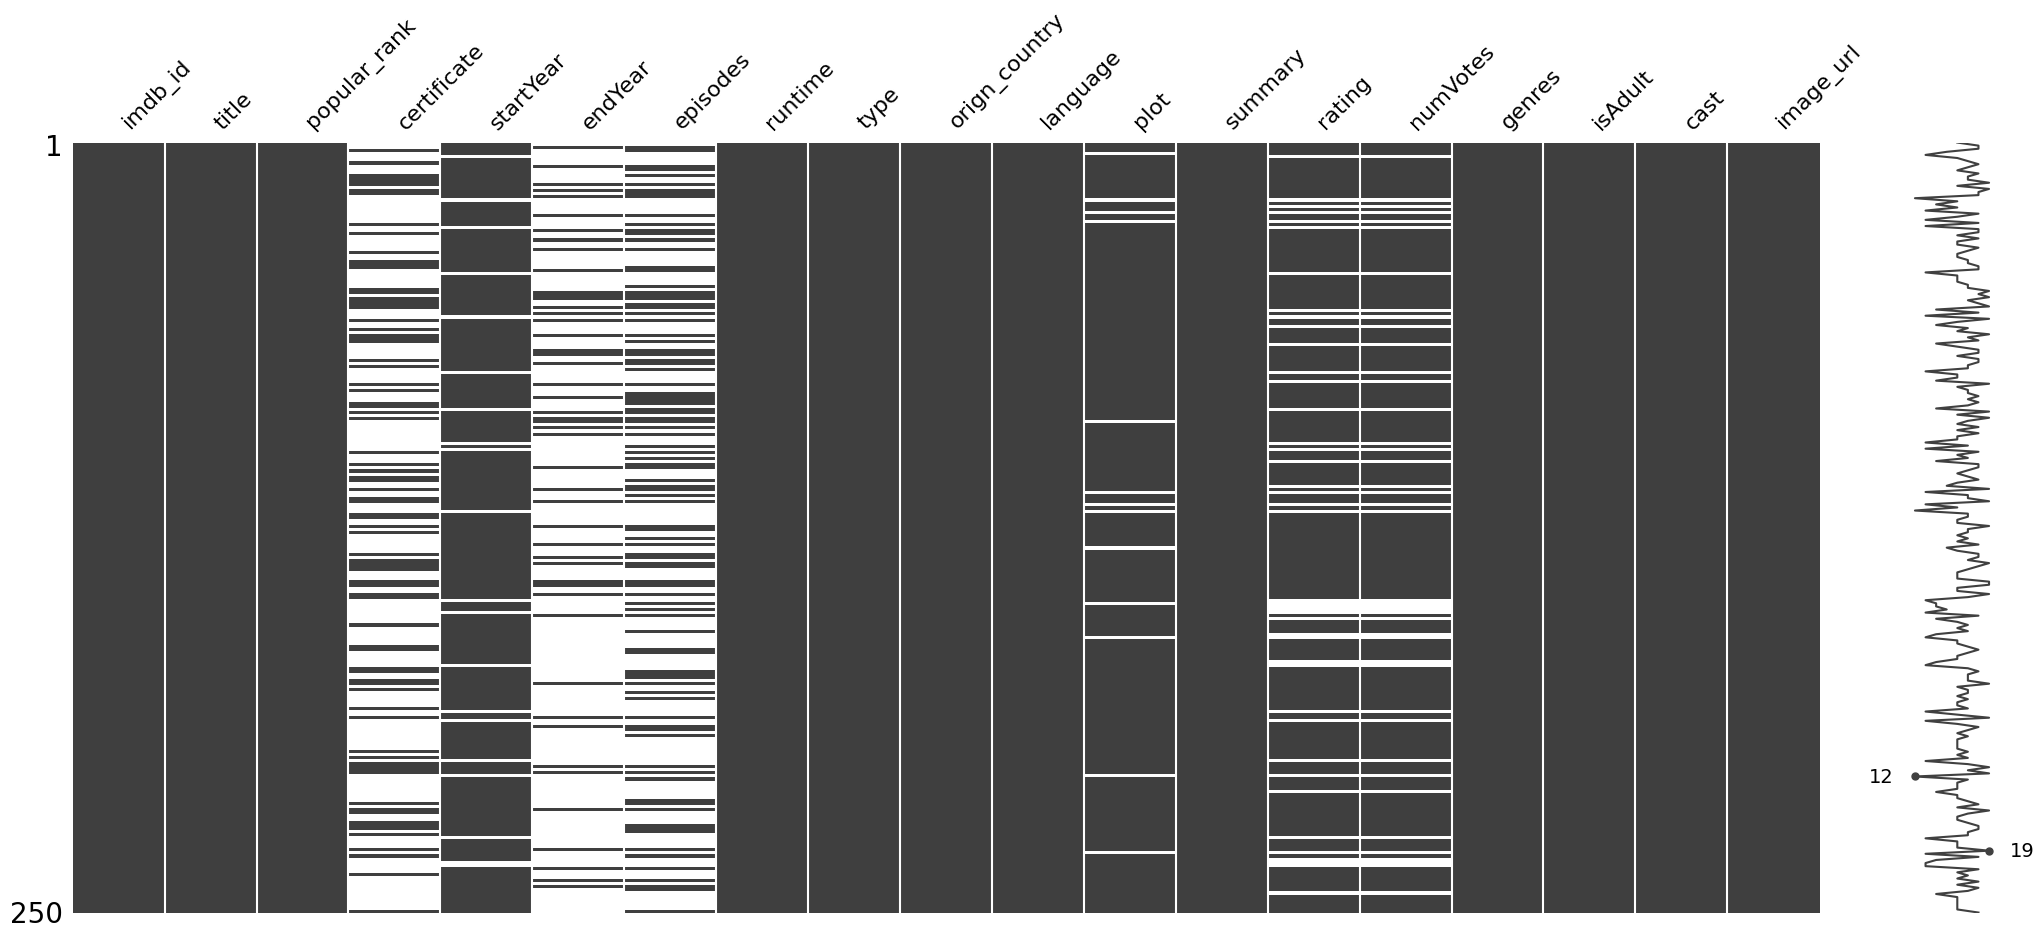

In [54]:
#vamos a graficar los datos nulos
msno.matrix(netflix_raw.sample(250))

Podemos ver una gran cantidad de datos nulos en las columnas endYear y episodes. Una razón es que las películas no tienen episodios y año de fin, por lo tanto todas van a tener NA en estas columnas.

In [55]:
#Vamos a filtrar las películas que no tienen año de estreno. Podemos observar que tampoco tienen datos sobre el "rating" y
#"numVotes".
netflix_raw[netflix_raw['startYear'].isnull()].isnull().mean()

imdb_id          0.000000
title            0.000000
popular_rank     0.000000
certificate      0.988350
startYear        1.000000
endYear          1.000000
episodes         0.895146
runtime          0.003883
type             0.003883
orign_country    0.000000
language         0.000000
plot             0.122330
summary          0.000000
rating           1.000000
numVotes         1.000000
genres           0.003883
isAdult          0.000000
cast             0.000000
image_url        0.000000
dtype: float64

In [57]:
#Al buscar las primeras de ellas en IMDB podemos ver pueden ser películas de 2022, como "The Gray Man" o "Pinocchio". En cuanto
#a "Untitled Hulk Hogan Biopic" aún está en producción. 

netflix_raw[netflix_raw['startYear'].isnull()].head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
554,tt1649418,The Gray Man,558.0,NaN,NaN,NaN,NaN,\N,movie,United States,English,"In Europe, a CIA operative-turned-assassin loo...","In Europe, a CIA operative-turned-assassin loo...",NaN,NaN,"Action,Thriller",0,"['Ana de Armas', 'Chris Evans', 'Ryan Gosling'...",https://m.media-amazon.com/images/G/01/imdb/im...
722,tt1488589,Pinocchio,728.0,NaN,NaN,NaN,NaN,\N,movie,France,English,A darker version of the classic children's fai...,"A dark, twisted retelling of the famous Carlo ...",NaN,NaN,"Animation,Drama,Family",0,"['Ewan McGregor', 'Cate Blanchett', 'Ron Perlm...",https://m.media-amazon.com/images/M/MV5BMTkwNj...
1027,tt9817210,Untitled Hulk Hogan Biopic,1033.0,NaN,NaN,NaN,NaN,\N,movie,United States,English,The story of wrestling legend Hulk Hogan.,The story of wrestling legend Hulk Hogan.,NaN,NaN,"Biography,Drama,Sport",0,['Chris Hemsworth'],https://m.media-amazon.com/images/G/01/imdb/im...
1067,tt11311302,Vikings: Valhalla,1073.0,NaN,NaN,NaN,24.0,\N,tvSeries,United States,English,Follow-up series to 'Vikings' set 100 years af...,Adventures of the most famous Vikings who ever...,NaN,NaN,"Action,Adventure,Drama",0,"['Laura Berlin', 'Sam Corlett', 'Bradley Freeg...",https://m.media-amazon.com/images/M/MV5BMzc0M2...
1073,tt8009428,Hustle,1079.0,NaN,NaN,NaN,NaN,\N,movie,United States,English,A washed-up basketball scout discovers a pheno...,A washed-up basketball scout discovers a pheno...,NaN,NaN,"Comedy,Drama,Sport",0,"['Adam Sandler', 'Robert Duvall', 'Ben Foster'...",https://m.media-amazon.com/images/M/MV5BMGM3ND...


In [58]:
#al buscar las películas de 2022, también vemos que no tienen "rating" ni "numVotes"

netflix_raw[netflix_raw['startYear'] == 2022].isnull().mean()

imdb_id          0.000000
title            0.000000
popular_rank     0.000000
certificate      0.984127
startYear        0.000000
endYear          1.000000
episodes         0.698413
runtime          0.000000
type             0.000000
orign_country    0.000000
language         0.000000
plot             0.253968
summary          0.000000
rating           1.000000
numVotes         1.000000
genres           0.000000
isAdult          0.000000
cast             0.000000
image_url        0.000000
dtype: float64

In [59]:
#All investigar los años de producción de las películas sin "rating", vemos que hay una cantidad grande de películas de 2021
#y 2022. Eso significa que la base de datos fue armada probablemente en 2021 contiene informaciones sobre películas en
#producción que ya pueden tener un cierto nivel de popularidad si está disponible una descripción de la trama o un tráiler,
#por ejemplo.

netflix_raw[netflix_raw['rating'].isnull()]['startYear'].value_counts()

2021.0    262
2022.0     63
2020.0     34
2017.0     27
2019.0     22
2018.0     21
2016.0     14
2015.0      7
2013.0      6
2014.0      5
2010.0      5
2012.0      4
2009.0      3
2008.0      3
2006.0      3
2003.0      3
2001.0      2
2011.0      2
2000.0      2
2004.0      2
2007.0      1
2005.0      1
2002.0      1
Name: startYear, dtype: int64

In [60]:
#Por lo tanto, vamos a borrar los registros cuyo startYear es superior a 2021 o NaN y que no tienen "rating" ni
#"numVotes".
nulls = (netflix_raw["startYear"].isnull() | (netflix_raw['startYear'] >= 2021)) & netflix_raw['rating'].isnull()

In [61]:
netflix_raw1 = netflix_raw[~nulls]

In [62]:
#Vamos a ver loos contenidos sin rating que quedaron. Al buscar los primeros en IMDB, podemos ver que algunos aún no tienen
#nota, como Green Beret's Guide to Surviving the Apocalypse y otros tienen muy pocos votos, como Big timber (1000 votos).
#En el momento en el que se armó el set de datos, estos podían simplemente no tener ningún voto. Por lo tanto, vamos a poner
#0 en numVotes y el rating promedio para su género

netflix_raw1[netflix_raw1['rating'].isnull()].head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
3272,tt7349416,Green Beret's Guide to Surviving the Apocalypse,3297.0,NaN,2017.0,NaN,6.0,\N,tvSeries,United States,English,"Vance, who plays a comic version of himself as...","Vance, who plays a comic version of himself as...",NaN,NaN,Comedy,0,"['Shawn Vance', 'Daril Fannin', 'Louise Bond',...",https://m.media-amazon.com/images/M/MV5BZjg0Nz...
4417,tt13695490,Netflix Anime,4452.0,NaN,2020.0,NaN,2.0,\N,tvSeries,Japan,English,NaN,-,NaN,NaN,Animation,0,"['Akidearest', 'Joey Bizinger', 'Connor Colquh...",https://m.media-amazon.com/images/M/MV5BNTVmOG...
4497,tt13322572,Big Timber,4532.0,NaN,2020.0,NaN,10.0,\N,tvSeries,Canada,English,Big Timber follows the dangerous work of logge...,Reality tv show on the History channel. BIG TI...,NaN,NaN,Reality-TV,0,"['Sarah Fleming', 'Erik Wenstob', 'Kevin Wenst...",https://m.media-amazon.com/images/M/MV5BZGY4M2...
4553,tt13102918,Cap Kakumei Bottleman,4588.0,NaN,2020.0,NaN,2.0,\N,tvSeries,Japan,Japanese,The anime centers around a boy named Kouta Kou...,The anime centers around a boy named Kouta Kou...,NaN,NaN,Animation,0,-,https://m.media-amazon.com/images/M/MV5BOTliMz...
4841,tt8096962,Stories of Strength and Hope: Preventing Youth...,4882.0,NaN,2018.0,NaN,NaN,12,short,United States,English,An up-to-date look at Youth Suicide with an ex...,An up-to-date look at Youth Suicide with an ex...,NaN,NaN,"Documentary,Short",0,"['John Halligan', 'Heather Cleary', 'Harold Ko...",https://m.media-amazon.com/images/M/MV5BM2Y2Yj...


In [63]:
nulls1 = netflix_raw1[netflix_raw1['rating'].isnull()]['numVotes'].index
netflix_raw1.loc[list(nulls1), 'numVotes'] = 0

In [64]:
#calculamos el rating promedio por tipo de contenido
rankings = netflix_raw1[netflix_raw1['rating'].notnull()].groupby('type')['rating'].mean()

In [65]:
#usamos la serie rankings para asignar los valores correctos a cada registros
for i in nulls1:
    netflix_raw1.loc[i, 'rating'] = rankings[netflix_raw1.loc[3272, 'type']]

In [66]:
#no quedan nulos en Rating
netflix_raw1['rating'].isnull().sum()

0

In [67]:
#ahora vamos a ver los registros que tienen valores nulos en plot. Todos tienen el mismo valor "-" en la columna "summary".
#Vamos a asignarlo también a la columna "plot" para indicar que faltan los datos.
netflix_raw1[netflix_raw1['plot'].isnull()]['summary'].unique()

array(['-'], dtype=object)

In [68]:
netflix_raw1.loc[netflix_raw1[netflix_raw1['plot'].isnull()].index, 'plot'] =\
netflix_raw1.loc[netflix_raw1[netflix_raw1['plot'].isnull()].index, 'summary']

In [69]:
#la mayoría de los contenidos que no tienen número de episodios son películas, tvEpisodes y otros contenidos que tienen solo
#una parte.
netflix_raw1[netflix_raw1['episodes'].isnull()].groupby('type')['imdb_id'].count()

type
movie           2548
short            106
tvEpisode        676
tvMiniSeries       5
tvMovie          151
tvSeries          33
tvShort            6
tvSpecial        383
video            106
videoGame          1
Name: imdb_id, dtype: int64

In [70]:
#vamos a poner 1 para todos los contenidos excepto a las tvSeries y tvMiniSeries
not_series = netflix_raw1['episodes'].isnull() & (netflix_raw1['type'] != 'tvSeries') & (netflix_raw1['type'] != 'tvMiniSeries')

In [71]:
netflix_raw1.loc[not_series, 'episodes'] = 1

In [72]:
#nos quedan 38 registros que no tienen datos sobre el número de episodios. Vamos a calcular la cantidad de episodios mediana
#para las series y miniseries y completar los registros nulos.
netflix_raw1['episodes'].isnull().sum()

38

In [73]:
print("mediana miniseries: ", netflix_raw1[netflix_raw1['type'] == 'tvMiniSeries']['episodes'].median(), "\n",\
"mediana series: ", netflix_raw1[netflix_raw1['type'] == 'tvSeries']['episodes'].median())

mediana miniseries:  6.0 
 mediana series:  17.0


In [74]:
netflix_raw1.loc[netflix_raw1['episodes'].isnull() & (netflix_raw1['type'] == 'tvMiniSeries'),'episodes'] = 6
netflix_raw1.loc[netflix_raw1['episodes'].isnull() & (netflix_raw1['type'] == 'tvSeries'),'episodes'] = 17

In [75]:
#EndYear puede ser nulo en dos casos. Si el contenido es una pelicula o si es una serie que aún no se termina.
netflix_raw1[netflix_raw1['endYear'].isnull()].head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,isAdult,cast,image_url
0,tt4052886,Lucifer,1.0,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy",0,"['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,tt0993840,Army of the Dead,2.0,18,2021.0,NaN,1.0,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror",0,"['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
4,tt9251798,Ragnarok,5.0,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy",0,"['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...
6,tt0413573,Grey's Anatomy,7.0,15+,2005.0,NaN,381.0,41,tvSeries,United States,English,A drama centered on the personal and professio...,A medical based drama centered around Meredith...,7.5,260703.0,"Drama,Romance",0,"['Ellen Pompeo', 'Chandra Wilson', 'James Pick...",https://m.media-amazon.com/images/M/MV5BMjgwNG...
7,tt12809988,Sweet Tooth,8.0,16,2021.0,NaN,8.0,\N,tvSeries,United States,English,A boy who is half human and half deer survives...,A boy who is half human and half deer survives...,8.2,9622.0,"Action,Adventure,Drama",0,"['Nonso Anozie', 'Christian Convery', 'Stefani...",https://m.media-amazon.com/images/M/MV5BOTk4ZD...


In [76]:
# Primero vamos a poner el mismo endYear que startYear a las películas y los otros contenidos, excepto a las series y miniseries

netflix_raw1.loc[(netflix_raw1['type'] != 'tvSeries') & (netflix_raw1['type'] != 'tvMiniSeries'), 'endYear'] =\
netflix_raw1.loc[(netflix_raw1['type'] != 'tvSeries') & (netflix_raw1['type'] != 'tvMiniSeries'),'startYear']

In [77]:
#nos quedan 1073 series o miniseries que no tienen año del fin porque aún no se acabaron o faltan los datos. Vamos a dejar
#los valores nulos
netflix_raw1.isnull().sum()

imdb_id             0
title               0
popular_rank        0
certificate      3795
startYear           0
endYear          1073
episodes            0
runtime             0
type                0
orign_country       0
language            0
plot                0
summary             0
rating              0
numVotes            0
genres              0
isAdult             0
cast                0
image_url           0
dtype: int64

In [78]:
#quedan muchos valores nulos en el campo "certificate"
netflix_raw1[netflix_raw1['certificate'].isnull()]['imdb_id'].count() / len(netflix_raw1)

0.6152723735408561

In [79]:
#Los vamos a remplazar por "Unknown"
netflix_raw1.loc[netflix_raw1['certificate'].isnull(), 'certificate'] = 'Unknown'

In [80]:
#Nos quedan valores nulos solamente en el campo endYear que corresponden a las series que aún no se han terminado
netflix_raw1.isnull().sum()

imdb_id             0
title               0
popular_rank        0
certificate         0
startYear           0
endYear          1073
episodes            0
runtime             0
type                0
orign_country       0
language            0
plot                0
summary             0
rating              0
numVotes            0
genres              0
isAdult             0
cast                0
image_url           0
dtype: int64

In [81]:
#Todos los registros tienen el mismo valor en "is Adult". Vamos a borrar la columna, así como la columna "image_url" que no
#va a servir para nuestro análisis
netflix_raw1['isAdult'].sum()

0

In [83]:
netflix_raw1.drop(['isAdult', 'image_url'], axis = 1).head()

,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,cast
0,tt4052886,Lucifer,1.0,15,2016.0,NaN,93.0,42,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy","['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra..."
1,tt0993840,Army of the Dead,2.0,18,2021.0,2021.0,1.0,148,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror","['Dave Bautista', 'Ella Purnell', 'Ana de la R..."
2,tt7255502,The Kominsky Method,3.0,18,2018.0,2021.0,22.0,30,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama","['Michael Douglas', 'Sarah Baker', 'Graham Rog..."
3,tt0108778,Friends,4.0,13+,1994.0,2004.0,235.0,22,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance","['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku..."
4,tt9251798,Ragnarok,5.0,18,2020.0,NaN,12.0,45,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy","['David Stakston', 'Jonas Strand Gravli', 'Her..."


In [84]:
#la columna runtime es un objeto pero debería tener valores númericos. 
netflix_raw1.dtypes

imdb_id           object
title             object
popular_rank     float64
certificate       object
startYear        float64
endYear          float64
episodes         float64
runtime           object
type              object
orign_country     object
language          object
plot              object
summary           object
rating           float64
numVotes         float64
genres            object
isAdult            int64
cast              object
image_url         object
dtype: object

In [85]:
#Vamos a convertir los datos
netflix_raw1.loc[:,'runtime'] = pd.to_numeric(netflix_raw1['runtime'], errors='coerce')

C:\Users\33768\AppData\Local\Temp\ipykernel_16652\2902814405.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  netflix_raw1.loc[:,'runtime'] = pd.to_numeric(netflix_raw1['runtime'], errors='coerce')
C:\Users\33768\AppData\Local\Temp\ipykernel_16652\2902814405.py:2: DeprecationWarning: In a future version, `df.iloc[:, i] = newvals` will attempt to set the values inplace instead of always setting a new array. To retain the old behavior, use either `df[df.columns[i]] = newvals` or, if columns are non-unique, `df.isetitem(i, newvals)`
  netflix_raw1.loc[:,'runtime'] = pd.to_numeric(netflix_raw1['runtime'], errors='coerce')


In [86]:
#tenemos 816 valores nulos donde no faltaban los datos. Vamos a remplazarlos por la duración promedio según el tipo 
#de contenido
netflix_raw1['runtime'].isnull().sum()

816

In [87]:
#calculamos las duraciones promedio
lengths = netflix_raw1.groupby('type')['runtime'].mean()
lengths

type
movie           100.427663
short            24.978022
tvEpisode        44.331288
tvMiniSeries    147.453271
tvMovie          74.284672
tvSeries         44.954294
tvShort          17.500000
tvSpecial        64.494413
video            75.989691
videoGame              NaN
Name: runtime, dtype: float64

In [88]:
rows_runtime_nan = netflix_raw1[netflix_raw1['runtime'].isnull()].index
for i in rows_runtime_nan:
    netflix_raw1.loc[i, 'runtime'] = lengths[netflix_raw1.loc[i, 'type']]

In [89]:
#tenemos un video juego que sigue teniendo un valor nulo. Vamos a borrar el registro porque es el único contenido de este tipo
netflix_raw1.isnull().sum()

imdb_id             0
title               0
popular_rank        0
certificate         0
startYear           0
endYear          1073
episodes            0
runtime             1
type                0
orign_country       0
language            0
plot                0
summary             0
rating              0
numVotes            0
genres              0
isAdult             0
cast                0
image_url           0
dtype: int64

In [90]:
netflix_raw1 = netflix_raw1[netflix_raw1['type'] != 'videoGame']

In [91]:
#Averiguamos si hay registros duplicados
netflix_raw1.duplicated().sum()

0

In [92]:
#finalmente vamos a borrar la columnas isAdult que tiene solo un valor
netflix_raw1['isAdult'].nunique()

1

In [93]:
netflix_raw1 = netflix_raw1.drop('isAdult', axis = 1)

In [94]:
#Algunos registros tienen el valor "\N" en la columna genero. Vamos a remplazarlo por Unknown
netflix_raw1.loc[netflix_raw1['genres'] == '\\N','genres'] = 'Unknown'

In [95]:
#Ahora vamos a aplicar la técnica de OneHotEncoding a la columna "genres". Vamos a ver la cantidad de categorías
generos = netflix_raw1['genres'].str.split(',') # transformamos los strings en lists
generos_list = [i for l in generos for i in l] # fusionamos todos los lists en uno
generos_array = np.array(generos_list)
len(np.unique(generos_array))
#En la columna generos tenemos 28 categorías

28

In [101]:
#Podemos ver la distribución de géneros
genres, counts = np.unique(generos_array, return_counts = True)
df_genre_counts = pd.DataFrame({'genres': genres, 'counts': counts})
sorted_df = df_genre_counts.sort_values(by = 'counts', ascending = False)
sorted_df

,genres,counts
7,Drama,2509
4,Comedy,1970
0,Action,1051
6,Documentary,978
5,Crime,927
2,Animation,808
1,Adventure,733
19,Romance,606
24,Thriller,580
16,Mystery,439


In [102]:
#separamos los géneros en varias columnas
split_genres = netflix_raw1.genres.str.split(',', expand = True)
split_genres

,0,1,2
0,Crime,Drama,Fantasy
1,Action,Crime,Horror
2,Comedy,Drama,None
3,Comedy,Romance,None
4,Action,Drama,Fantasy
...,...,...,...
7003,Comedy,None,None
7004,Unknown,None,None
7005,Documentary,Sport,None
7006,Drama,Romance,None


In [103]:
#tenemos 79 columnas. 
genres_encoded = pd.get_dummies(split_genres)
genres_encoded

,0_Action,0_Adventure,0_Animation,0_Biography,0_Comedy,0_Crime,0_Documentary,0_Drama,0_Family,0_Fantasy,...,2_News,2_Reality-TV,2_Romance,2_Sci-Fi,2_Short,2_Sport,2_Talk-Show,2_Thriller,2_War,2_Western
0,0,0,0,0,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,0,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7005,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7006,0,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [104]:
genres_encoded.sum(axis = 1)

0       3
1       3
2       2
3       2
4       3
       ..
7003    1
7004    1
7005    2
7006    2
7007    1
Length: 6167, dtype: int64

In [105]:
# Vamos a sumar las columnas con el mismo género. Creamos una función
def sum_columns(df, genre):
    return(df.loc[:, df.columns.str.contains(f'{genre}$')])
sum_columns(genres_encoded, 'Drama').sum(axis=1)

0       1
1       0
2       1
3       0
4       1
       ..
7003    0
7004    0
7005    0
7006    1
7007    0
Length: 6167, dtype: int64

In [106]:
encoded_final = pd.DataFrame()
for genre in sorted_df['genres']:
    encoded_final[genre] = sum_columns(genres_encoded, genre).sum(axis = 1)

In [175]:
#tenemos una columna por variable. Podemos concatenar este dataframe con el dataframe principal cuando lo necesitemos.
#por ahora lo vamos a guardar en csv.
encoded_final.to_csv('encoded_final.csv')
encoded_final

,Drama,Comedy,Action,Documentary,Crime,Animation,Adventure,Romance,Thriller,Mystery,...,Short,Sport,War,Musical,Talk-Show,Game-Show,Unknown,Western,News,Film-Noir
0,1,0,0,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,1,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7003,0,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
7004,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
7005,0,0,0,1,0,0,0,0,0,0,...,0,1,0,0,0,0,0,0,0,0
7006,1,0,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,0


In [55]:
#guardamos el set de datos limpia en csv para usarla después.
netflix_raw1.to_csv('netflix_clean.csv')

# Análisis exploratorio de datos

## ¿Qué películas y series le gustan a la gente?
Como a todos nos gusta ver películas y series, no es raro preguntarse cuáles son las películas y series que tienen más popularidad entre la gente. Conociendo los gustos de los otros podemos darnos cuenta si somos parecidos a la mayoría de la gente o tenemos preferencias originales. Por otro lado, las clasificaciones de películas son una fuente excelente de información para encontrar nuevas producciones que nos pueden gustar. Al fin y al cabo, si le gustan a mucha gente, no deben ser tan malos. Así que por qué no darles una oportunidad. ¿Cómo se puede saber si una película es popular o no? Por suerte, no es necesario hacer encuestas o cotejar revistas de cine. Hay plataformas como IMDB que calculan la popularidad de películas y series basándose en las búsquedas de la gente. Sin embargo, una pregunta más difícil es saber por qué uno u otro contenido se vuelve popular mientras otros no le llaman la atención a casi nadie. Intuitivamente, podríamos pensar que tiene que ver con la calidad de los contenidos, los actores involucrados, el género y el idioma de producción. Sería interesante estudiar la relación entre las carácteristicas que acabamos de mencionar y el rango de popularidad final de un contenido para confirmar o refutar nuestra intuición. En el presente set de datos están reunidas informaciones sobre diferentes películas, series y otros contenidos disponibles en Netflix. Cada registro contiene varios campos, inclusive el rango de popularidad, que indica el éxito del contenido entre los espectadores. Para entender mejor el set de datos y identificar los factores determinantes para el rango de popularidad, vamos a plantear las siguientes preguntas:

-¿De qué tipo de contenido se trata en el set de datos?

-¿Hay países que producen más contenidos que otros?

-¿Los nuevos contenidos son más populares que los contenidos más antiguos?

-¿Hay una relación entre la popularidad de los contenidos y su nota en IMDB?

En general nos interesamos por las películas y las series populares más bien que por las que nadie mira. Por lo tanto, vamos a concentrarnos sobre los 250 contenidos más populares para analizar sus cáracteristicas en común.


-¿Qué tipos de contenido son más frecuentes entre los 250 contenidos más populares?

-¿Qué géneros se encuentran más a menudo entre los 250 contenidos más populares?

-¿Los contenidos del top 250 tienen buenas notas en IMDB?

-¿Cuáles son los actores que salen más en las películas o series del top 250?

A menudo, decidimos ver una película porque está protagonizada por algún actor que nos gusta. Podemos suponer que los actores contribuyen a la popularidad de las películas. Por lo tanto, sería interesante identificar los top 10 actores del top 250. Luego nos podemos plantear las siguientes preguntas:


-¿Los actores con más papeles en el top 250 son los mismos que en el set de datos entero?

-¿Cuál de los actores actuó en mejores películas?

Al analizar el set de datos y contestar a las preguntas planteadas, podremos entender mejor cuáles son los factores determinantes para la popularidad de una película o serie, y tal vez incluso descubriremos alguna película o serie de interés para nosotros.

In [108]:
url = 'https://drive.google.com/file/d/1xR2HHhVI1ofOZGlD7hYBuhWP9JNl5ubn/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
df = pd.read_csv(path)
df.head()

,Unnamed: 0,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,cast,image_url
0,0,tt4052886,Lucifer,1.0,15,2016.0,NaN,93.0,42.0,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy","['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,1,tt0993840,Army of the Dead,2.0,18,2021.0,2021.0,1.0,148.0,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror","['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,2,tt7255502,The Kominsky Method,3.0,18,2018.0,2021.0,22.0,30.0,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama","['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,3,tt0108778,Friends,4.0,13+,1994.0,2004.0,235.0,22.0,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance","['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,4,tt9251798,Ragnarok,5.0,18,2020.0,NaN,12.0,45.0,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy","['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


# ¿De qué tipos de contenido se trata en el set de datos?

In [281]:
types = df['type'].value_counts()
types

movie           2549
tvSeries        1909
tvEpisode        676
tvSpecial        383
tvMiniSeries     281
tvMovie          151
short            106
video            106
tvShort            6
Name: type, dtype: int64

In [347]:
len(df)

6167

Se puede ver que los dos tipos de contenidos más frecuentes en Netflix son las películas y las teleseries, seguidas por los episodios botella y las emisiones especiales. Para saber si son tipos de contenido realmente interesantes, buscaremos el rango más alto para cada tipo.

In [282]:
df.groupby('type')['popular_rank'].min().sort_values(ascending=True)

type
tvSeries           1.0
movie              2.0
tvSpecial         17.0
tvMiniSeries      35.0
short            842.0
video            942.0
tvMovie          960.0
tvShort         2497.0
tvEpisode       6278.0
Name: popular_rank, dtype: float64

El primer episodio botella tiene un rango popular de 6278, por lo tanto, podemos concluir que los episodios botella no son un tipo de contenido realmente importante para los usuario. Al contrario, la primera emisión especial del set de datos tiene un rango de 17 que es un buen rango popular. Las mini-teleseries también pueden ser un tipo de contenido interesante puesto que la primer mini-teleserie tiene un rango popular de 35.

# ¿Hay países que producen más contenidos que los otros?

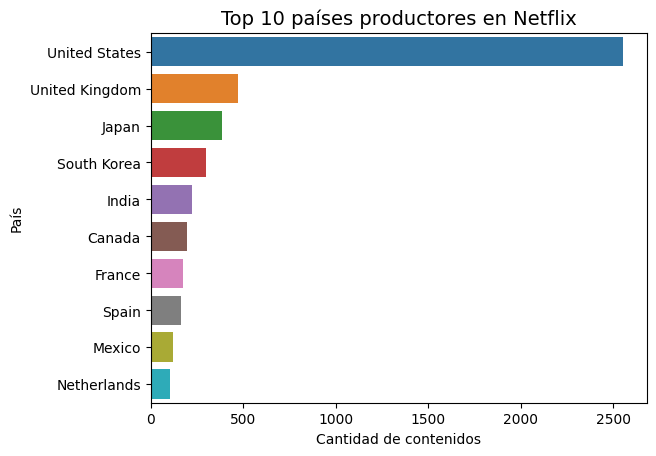

In [283]:
top_countries = df[df['orign_country'] != '-'].groupby('orign_country')['imdb_id'].count().sort_values(ascending=False).head(10)
top_countries = top_countries.reset_index()
top_countries = top_countries.rename(columns = {'imdb_id': 'count'})

fig, ax = plt.subplots()
sns.barplot(ax=ax, data = top_countries, y = 'orign_country', x = 'count')
plt.ylabel('País', size = 10)
plt.xlabel('Cantidad de contenidos', size = 10)
plt.title("Top 10 países productores en Netflix", size = 14)
plt.show()

El mayor productor de contenidos de Netflix es de lejos los Estados Unidos. Producen 5 veces más contenidos que el segundo productor, el Reino Unido. Lo que puede en parte explicar la abundancia de contenidos de este país es el simple hecho que Netflix es una plataforma estadounidense y los EEUU son uno de sus mercados principales. Sin embargo, aún no sabemos si los Estados Unidos son también el país que tiene más contenido populares. Para saberlo vamos a analizar los 1000 contenidos más populares del set de datos.

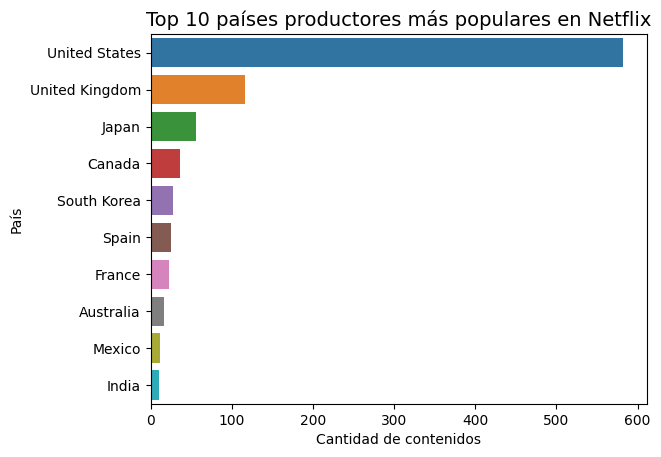

In [284]:
df1000 = df.head(1000)
top_countries = df1000[df1000['orign_country'] != '-'].groupby('orign_country')['imdb_id'].count().\
sort_values(ascending=False).head(10)
top_countries = top_countries.reset_index()
top_countries = top_countries.rename(columns = {'imdb_id': 'count'})

fig, ax = plt.subplots()
sns.barplot(ax=ax, data = top_countries, y = 'orign_country', x = 'count')
plt.ylabel('País', size = 10)
plt.xlabel('Cantidad de contenidos', size = 10)
plt.title("Top 10 países productores más populares en Netflix", size = 14)
plt.show()

En el segundo gráfico vemos que los Estados Unidos no es solo el país con más producción, también éstas son más presentes en el top 1000 de los contenidos más populares que las de los otros países. Por cierto, el segundo y tercer puesto de nuevo son para el Reino Unido y Japón.

# ¿Los nuevos contenidos son más populares que los contenidos más antiguos?

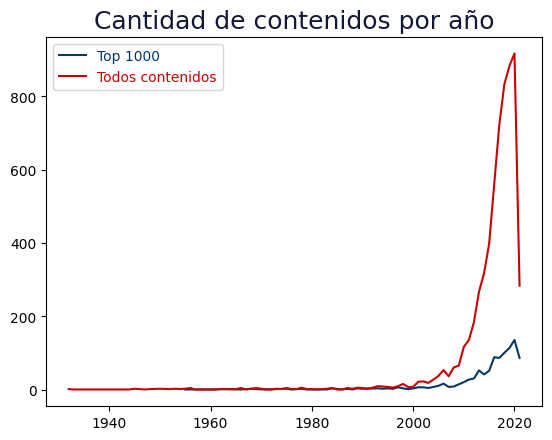

In [6]:
# Seleccionamos los 1000 primeros contenidos del conjunto de datos
df1000 = df.head(1000)
top_x_year = df1000['startYear'].value_counts().reset_index()
top_x_year = top_x_year.rename(columns = {'index':'Year', 'startYear':'Count'})
dfcount = df['startYear'].value_counts().reset_index()
# Cambiamos los nombres de las columnas
dfcount = dfcount.rename(columns = {'index':'Year', 'startYear':'Count'})

# Construimos una gráfica con colores evocativos de Netflix
fig, ax = plt.subplots()
sns.lineplot(ax=ax, data = top_x_year, x = 'Year', y = 'Count', label = 'Top 1000', color = "#073763")
sns.lineplot(ax=ax, data = dfcount, x = 'Year', y = 'Count', label = 'Todos contenidos', color = '#cc0000')
plt.ylabel(None)
plt.xlabel(None)
plt.legend(labelcolor= "linecolor")
plt.title('Cantidad de contenidos por año', fontsize = 18, color = "#131834")
plt.show()

En el presente gráfico podemos ver que la mayor parte de los contenidos de Netflix fueron producidos después del año 2000 y alcanzan el pico en 2020. Los contenidos del top1000 siguen la misma dinámica. Así podemos observar que tanto del punto de vista del país de producción como del año de producción, los años y los países que tienen más contenidos también están más presentes en el top 1000.

Como la distribución de los años y países de producción en top 1000 es parecida a la de todo el set de datos, no podemos concluir que el año y el país tienen un efecto sobre el éxito de un contenido.

# ¿Hay una relación entre la popularidad de los contenidos y su nota en IMDB?

Podemos suponer que el rango popular de las películas está relacionado con sus notas en IMDB. Las películas con un rango popular más alto deberían tener mejores notas. Vamos a hacer un gráfico para visualizar la relación entre estas dos variables.

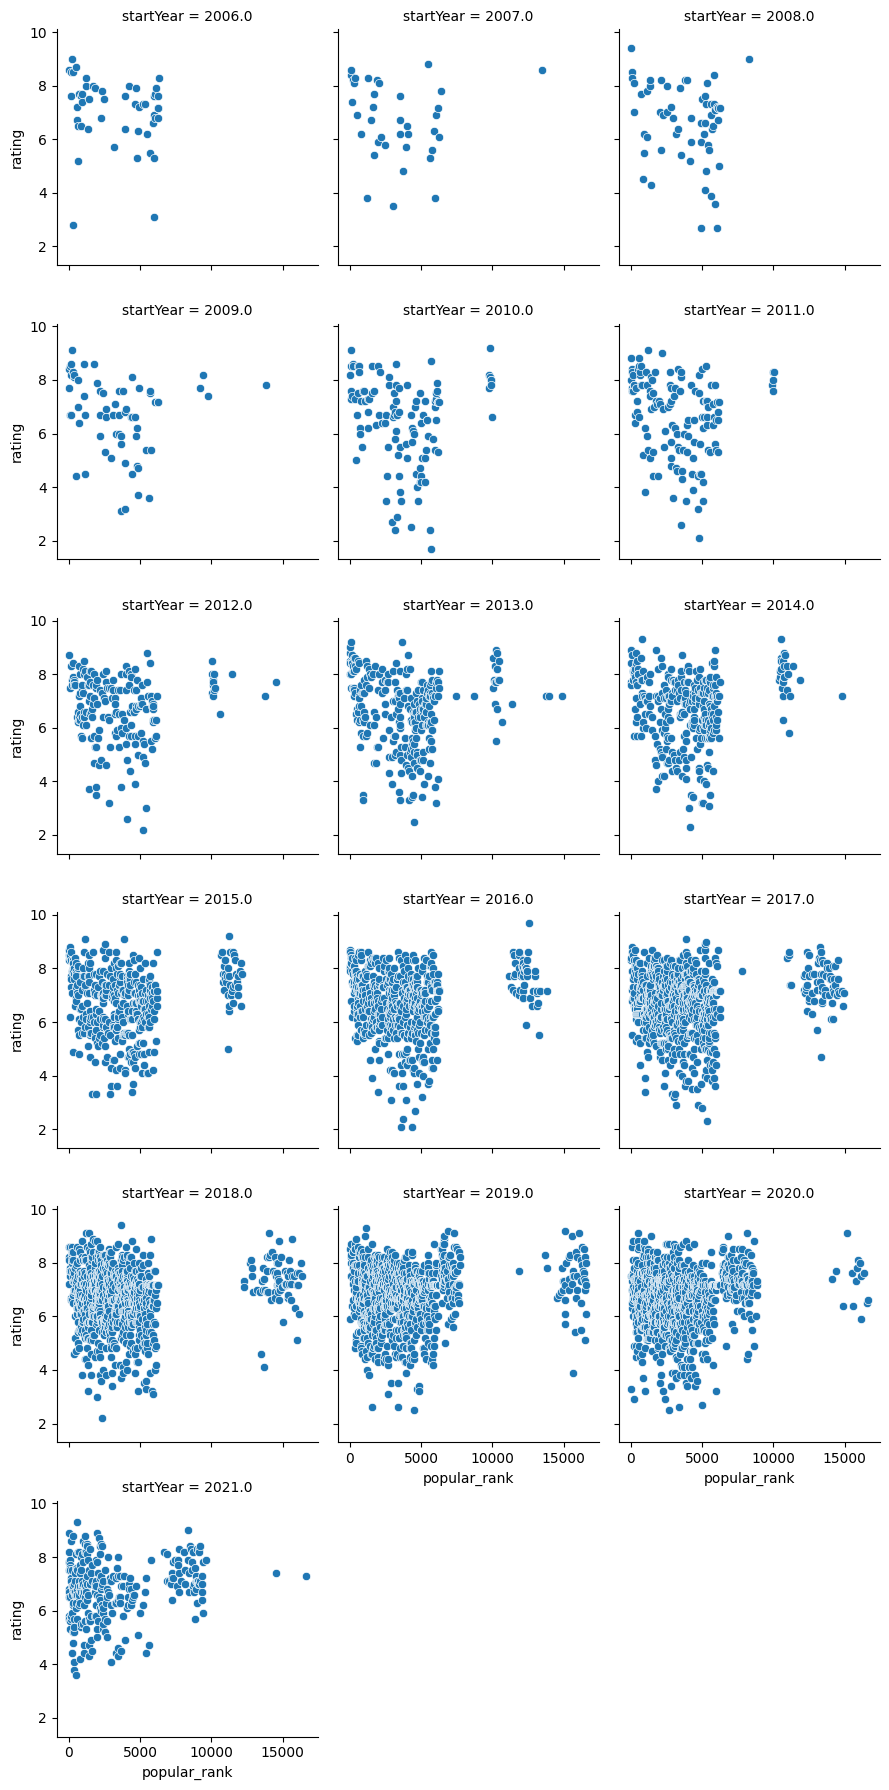

In [310]:
#como vimos que la mayoría de las películas de Netflix fueron producidas después de 2005, vamos a concentrarnos sobre
#estos años y análisar la relación entre la popularidad y la nota de los contenidos por año

df2005 = df[df['startYear']>2005]
g = sns.FacetGrid(df2005, col="startYear", col_wrap = 3)
g.map_dataframe(sns.scatterplot, x ='popular_rank', y = 'rating')

Sin embargo, no podemos observar ningún patrón en los gráficos. Aunque los puntos en la parte más izquierda de los gráficos de algunos años parecen estar más alto que el resto, la diferencia es muy leve. Al mismo tiempo podemos ver que la cantidad de puntos es más grande en el medio del gráfico. Una solucion para tomar la cantidad de puntos en cuenta sería usar un gráfico de tipo hexbin.

<function matplotlib.pyplot.show(close=None, block=None)>

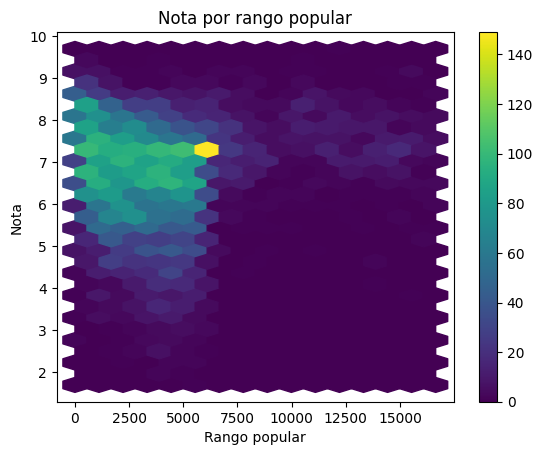

In [311]:
fig, ax = plt.subplots()

hexbin = ax.hexbin(df.popular_rank, df.rating, gridsize=(15,15))
ax.set_title("Nota por rango popular")
ax.set_xlabel('Rango popular')
ax.set_ylabel('Nota')
plt.colorbar(hexbin, ax=ax)
plt.show

Al mirar la barra de colores, podemos identificar los hexágonos que tienen más puntos, son de color amarillo y verde. En este gráfico, se vuelve más clara la relación entre el rango popular y la nota. En la parte izquierda del gráfico observamos hexágonos verdes situados más alto que en el resto del gráfico. Al mismo tiempo, vemos que entre el rango popular de 2500 y el de 6000, los hexágonos verdes forman una línea recta, lo que significa que a este nivel la calidad de las películas es más o menos la misma y por lo tanto deja de ser un factor importante.

Para seguir analizando la relación entre los rangos populares y las notas, vamos a dividir el set de datos en intervalos y calcular el promedio para cada intervalo.

In [7]:
#Primero nos quedamos con las películas que tienen un rango popular inferior a 6000, ya que podemos ver en el gráfico que
# a la derecha de este punto no hay hexágonos verdes y podríamos pensar que son datos outliers.
df6000 = df[df['popular_rank'] < 6000]

In [8]:
#Vamos a dividir el set de datos en grupos de 500. Usamos el index de la tabla ya que los datos están ordenados
#por el rango popular

df6000.loc[:,'interval'] = pd.cut(df6000.index, 12)

C:\Users\33768\AppData\Local\Temp\ipykernel_16652\3122023226.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df6000.loc[:,'interval'] = pd.cut(df6000.index, 12)


In [9]:
promedios = df6000.groupby('interval')['rating'].mean().reset_index()
promedios['interval_number'] = promedios.index + 1
promedios

,interval,rating,interval_number
0,"(-5.318, 443.167]",7.448649,1
1,"(443.167, 886.333]",6.888713,2
2,"(886.333, 1329.5]",6.763657,3
3,"(1329.5, 1772.667]",6.777427,4
4,"(1772.667, 2215.833]",6.611964,5
5,"(2215.833, 2659.0]",6.601126,6
6,"(2659.0, 3102.167]",6.454798,7
7,"(3102.167, 3545.333]",6.412641,8
8,"(3545.333, 3988.5]",6.360045,9
9,"(3988.5, 4431.667]",6.337984,10


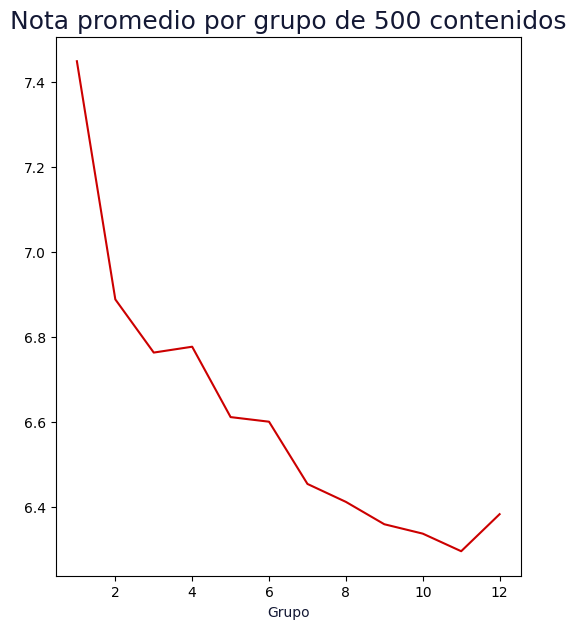

In [45]:
fig, ax = plt.subplots(figsize = (6, 7))

sns.lineplot(data = promedios, x = 'interval_number', y = 'rating')
ax.set_title("Nota promedio por grupo de 500 contenidos", size = 18, color = "#131834")
ax.set(xlabel = None, ylabel = None)
ax.set_xlabel('Grupo', color = "#131834")

plt.show()

El análisis de las medias nos muestra que hay una bajada en la calidad de las películas a medida que avanzamos hacia los rangos populares más bajos. Sólo hay una ligera subida en el último intervalo que corresponde al hexágono amarillo del hexbin que hicimos. Pues, este intervalo tiene una gran cantidad de puntos con una nota relativamente alta.

Podemos realizar el mismo analisís para los mil primeros registros del set de datos.

In [316]:
df1000 = df.head(1000)

In [317]:
df1000.loc[:, 'interval'] = pd.cut(df1000.index, 10)

C:\Users\33768\AppData\Local\Temp\ipykernel_13064\2830041273.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1000.loc[:, 'interval'] = pd.cut(df1000.index, 10)


In [318]:
promedios1000 = df1000.groupby('interval')['rating'].mean().reset_index()
promedios1000['interval_number'] = promedios1000.index + 1
promedios1000

,interval,rating,interval_number
0,"(-0.999, 99.9]",7.939,1
1,"(99.9, 199.8]",7.576,2
2,"(199.8, 299.7]",7.517,3
3,"(299.7, 399.6]",7.032,4
4,"(399.6, 499.5]",7.088,5
5,"(499.5, 599.4]",6.972,6
6,"(599.4, 699.3]",6.909,7
7,"(699.3, 799.2]",6.800,8
8,"(799.2, 899.1]",6.714,9
9,"(899.1, 999.0]",6.683,10


<AxesSubplot: xlabel='interval_number', ylabel='rating'>

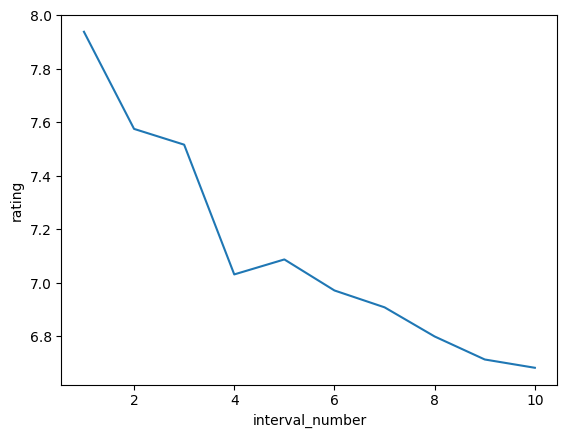

In [319]:
sns.lineplot(data = promedios1000, x = 'interval_number', y = 'rating')

Por lo general, la nota promedio va bajando junto al rango popular. Podemos concluir que la nota de IMDB es un factor importante para la popularidad de una película. Los usuarios tienden a interesarse por los contenidos de mejor calidad.

# ¿Qué tipos de contenido son más frecuentes entre los 250 contenidos más populares?

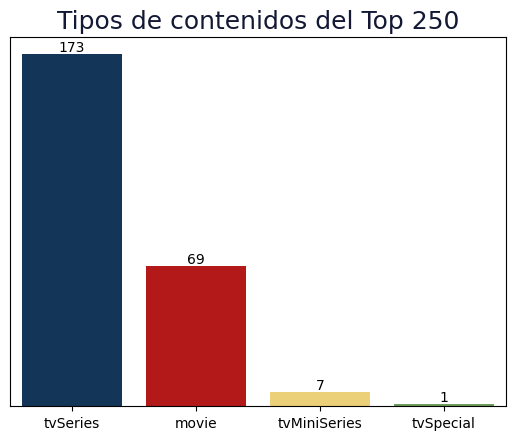

In [109]:
# Hacemos una visualización de los tipos de contenido más frecuentes en el top 250

# Definimos una paleta de colores similar a la de Netflix
palette = {
    'tvSeries': "#073763",
    'movie': "#cc0000",
    'tvMiniSeries': "#ffd966",
    'tvSpecial': "#6aa84f",
    'tvEpisode': "#000000"
}
# Selecicionamos los 250 primeros contenidos del conjunto de datos
df250 = df.head(250)
types250 = df250['type'].value_counts().reset_index()
types250 = types250.rename(columns = {'index':'type', 'type': 'count'})

# Construimos la gráfica
fig,ax = plt.subplots()
sns.barplot(ax=ax, data = types250, x = 'type', y = 'count', palette = palette)
ax.bar_label(ax.containers[0])
plt.title('Tipos de contenidos del Top 250', size = 18, color = "#131834")
plt.tick_params(left = False, labelleft = False)
ax.set(xlabel = None, ylabel = None)
plt.show()

Como lo podíamos sospechar basado en la respuesta a la pregunta 1, los dos tipos de contenidos más presentes en el top 250 son las películas y las teleseries. Sin embargo, podemos hacer una observación interesante. Mientras en el set de datos hay 600 películas más que series, en el top 250 las teleseries parecen ser totalmente predominantes. Representan 173 de los 250 contenidos.

# ¿Qué géneros se encuentran más a menudo entre los 250 contenidos más populares?

In [110]:
#Poner todos los géneros en un string.
string = df250['genres'].str.cat(sep = ',')
#crear un array con todos los géneros por separado
allgenres = np.array(string.split(sep = ','))
#contar los géneros de cada tipo
counts = np.unique(allgenres, return_counts = True)
#crear un dataframe con los géneros y las cantidades
dfcounts = pd.DataFrame({'genre': counts[0], 'count': counts[1]})

In [111]:
genres_counts = dfcounts.sort_values('count', ascending = False)
genres_counts

,genre,count
6,Drama,171
5,Crime,90
0,Action,86
4,Comedy,62
1,Adventure,61
13,Mystery,37
17,Thriller,29
2,Animation,25
14,Romance,23
8,Fantasy,22


Cada película en el set de datos tiene varios géneros, por lo tanto, la suma total en la columna "count" no es 250. El género drama es bastante génerico. Podemos tener un drama criminal, un drama-thriller, un drama con elementos de acción, etc. Esto explica la abundancia de películas de este género. En el resto de la tabla, podemos observar algunas tendencias interesantes. Las películas de crímen y de acción son claramente más númerosas. Además son género compatibles entre sí y con el género "drama". Así, podemos suponer que una película definida como "drama, crimén, acción" tendría buenas probabilidades de llamar la atención del público. También son populares las peliculas de aventura y las comedias que también son géneros compatibles entre sí y con el género "acción". En conclusión, podemos destacar dos grandes grupos de películas en el top 250 que son los dramas criminales y las películas de comedia y aventura más ligeras.

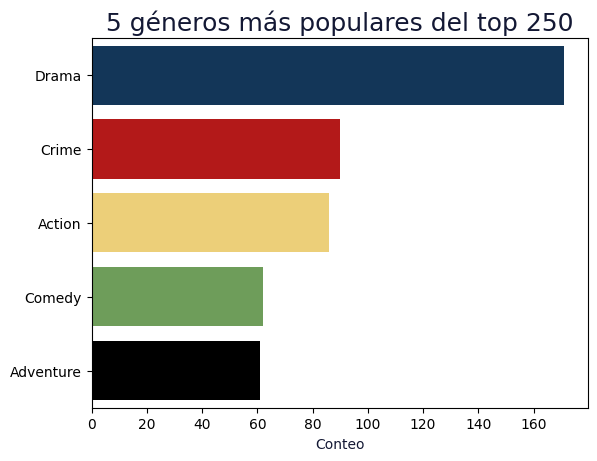

In [112]:
# Hacemos una gráfica para visualizar los 5 géneros más populares del top 250
genres5 = genres_counts.head(5)
fig, ax = plt.subplots()
sns.set_palette(["#073763","#cc0000", "#ffd966", "#6aa84f", "#000000"])
sns.barplot(ax = ax, data = genres5, y = 'genre', x = 'count')
ax.set_title('5 géneros más populares del top 250', fontsize = 18, color = "#131834")
ax.set_ylabel(None)
ax.set_xlabel('Conteo', color = "#131834")
plt.show()

# ¿Los contenidos del top 250 tienen buenas notas en IMDB?

In [114]:
type250 = df250[df250['type'].isin(['movie', 'tvSeries'])].groupby('type')['rating'].mean()
type250 = type250.reset_index()
type250

,type,rating
0,movie,6.843478
1,tvSeries,8.026590


Para contestar a esta pregunta, analizamos solo las películas y las series, porque los dos otros tipos de contenido son poco númerosos en el top 250. Podemos ver que las teleseries del top250 tienen una nota de IMDB promedio bastante alta. La nota promedio de las películas es más baja.

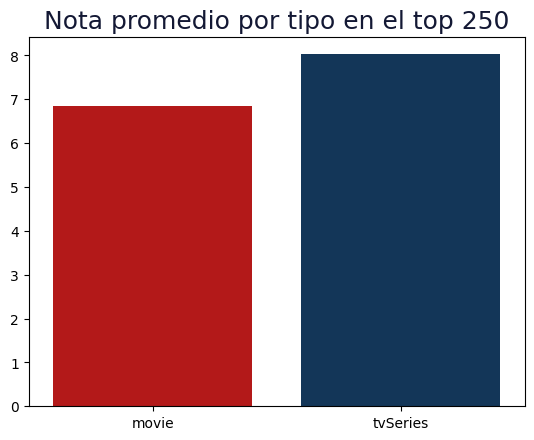

In [41]:
# Hacemos una visualización de la tabla
fig, ax = plt.subplots()
sns.barplot(ax=ax, data = type250, x = 'type', y = 'rating', palette = palette)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Nota promedio por tipo en el top 250', fontsize = 18, color = "#131834")
plt.show()

In [31]:
df_mean_type = df[df['type'].isin(['movie', 'tvSeries'])].groupby('type')['rating'].mean().reset_index()
df_mean_type

,type,rating
0,movie,6.120644
1,tvSeries,7.175691


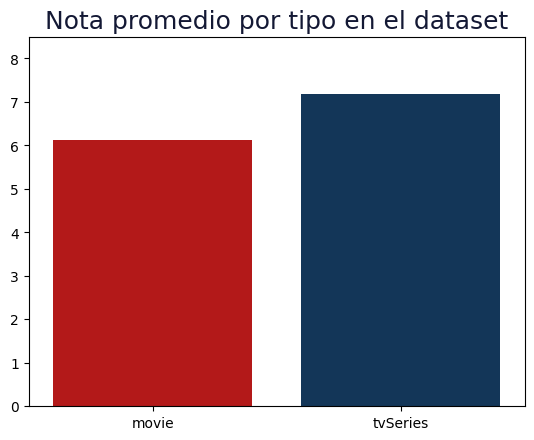

In [44]:
fig, ax = plt.subplots()
sns.barplot(ax=ax, data = df_mean_type, x = 'type', y = 'rating', palette = palette)
ax.set_ylabel(None)
ax.set_xlabel(None)
ax.set_title('Nota promedio por tipo en el dataset', fontsize = 18, color = "#131834")
ax.set_ylim(top=8.5)
plt.savefig('Notaprotodos.png')

Si comparamos estas cifras con los del set de datos entero, podemos ver que son más altas en ambos casos. Pareciera que los usuarios están más interesados por los contenidos de mejor calidad. En cuanto, a la diferencia entre las películas y las teleseries, parece estar presente tanto en el top 250 como en el set de datos entero, lo que significa que las películas propuestas por Netflix son en general menos buenas que sus series. Entre otras cosas, esa podría una razón por qué las series son más presentes en el top 250 que las películas.

# ¿Cuáles son los actores que salen más en las películas o series del top 250?

In [292]:
#escribimos una función para contar los actores en un set de datos
def actor_count(df):
    cast1 = df['cast'].str.strip('[]')
    cast1 = cast1.str.replace("'", '')
    cast1 = cast1.str.split(',')
    castlist = sum(cast1, [])
    castarray = np.array(castlist)
    castarray = np.char.strip(castarray)
    counts = np.unique(castarray, return_counts = True)
    df_counts = pd.DataFrame({'actor':counts[0], 'count': counts[1]})
    return df_counts[df_counts['actor']!='-'].sort_values('count', ascending = False)
def main_actor_count(df):
    cast1 = df['cast'].str.strip('[]')
    cast1 = cast1.str.replace("'", '')
    cast1 = cast1.str.split(',')
    castlist = []
    for i in cast1:
        if len(i) > 1:
            castlist.append(i[0:2])
        else:
            castlist.append(i)
    castlist = sum(castlist, [])
    castarray = np.array(castlist)
    castarray = np.char.strip(castarray)
    counts = np.unique(castarray, return_counts = True)
    df_counts = pd.DataFrame({'actor':counts[0], 'count': counts[1]})
    return df_counts[df_counts['actor']!='-'].sort_values('count', ascending = False)

In [293]:
actor_count(df250).head(10)

,actor,count
1087,Dwayne Johnson,5
491,Bobby Cannavale,4
2565,Martin Freeman,4
2074,Kate Walsh,4
1918,Jon Bernthal,4
2464,Majel Barrett,4
3693,Ted Danson,4
1392,Graham McTavish,4
571,Bryce Papenbrook,4
995,Dee Bradley Baker,4


In [294]:
df250[df250['cast'].str.contains('Kate Walsh')]

,Unnamed: 0,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,cast,image_url
89,89,tt1312171,The Umbrella Academy,90.0,16+,2019.0,NaN,30.0,60.0,tvSeries,United States,English,"A family of former child heroes, now grown apa...","On the same day in October 1989, forty-three i...",8.0,170324.0,"Action,Adventure,Comedy","['Elliot Page', 'Tom Hopper', 'David Castañeda...",https://m.media-amazon.com/images/M/MV5BNzA5Mj...
152,153,tt1838556,Honest Thief,154.0,PG-13,2020.0,2020.0,1.0,99.0,movie,United States,English,"Wanting to lead an honest life, a notorious ba...",They call him the In-and-Out-Bandit because me...,6.0,36583.0,"Action,Crime,Drama","['Liam Neeson', 'Kate Walsh', 'Jai Courtney', ...",https://m.media-amazon.com/images/M/MV5BZjEwNj...
157,158,tt1837492,13 Reasons Why,159.0,16+,2017.0,2020.0,49.0,60.0,tvSeries,United States,English,"Follows teenager Clay Jensen, in his quest to ...","Thirteen Reasons Why, based on the best-sellin...",7.6,262439.0,"Drama,Mystery,Thriller","['Dylan Minnette', 'Katherine Langford', 'Chri...",https://m.media-amazon.com/images/M/MV5BMDYzZT...
237,240,tt8962124,Emily in Paris,241.0,16,2020.0,NaN,20.0,30.0,tvSeries,United States,French,A young American woman from the Midwest is hir...,A young American woman from the Midwest is hir...,7.0,52991.0,"Comedy,Drama,Romance","['Lily Collins', 'Philippine Leroy-Beaulieu', ...",https://m.media-amazon.com/images/M/MV5BYTFjZj...


Varios actores salen 3 o 4 veces en el top250 de los contenidos de Netflix. Sin embargo, excepto a Wayne Johnson, no son actores famosos e incluso pueden tener roles secundarios en las películas como lo podemos ver con el ejemplo de Kate Walsh. En las 4 películas en las que aparece, solo en una está a la cabeza de la lista de los actores. ¿Tal vez, deberíamos considerar solo los primeros actores de cada reparto?

In [295]:
top250actors = main_actor_count(df250).head(10)
top250actors

,actor,count
138,Dwayne Johnson,3
319,Martin Freeman,3
236,Jon Bernthal,2
74,Bryce Papenbrook,2
25,Amy Adams,2
210,Jason Bateman,2
436,Tom Holland,2
196,Jack Black,2
189,Ian McKellen,2
58,Bill Skarsgård,2


Ahora obtuvimos una lista de actores que interpretaron más papeles principales en las series y películas del top 250. Son actores más conocidos esta vez. Es probable que hayan sido importantes para la popularidad de sus películas.

# ¿Los actores con más papeles en el top 250 son los mismos que en el set de datos entero?

In [296]:
#buscamos a los actores con más papeles en todo el set de datos
df_movie_serie = df[(df['type'].isin(['movie', 'tvSeries'])) & (df['cast'] != '-')]
best_actors = main_actor_count(df_movie_serie)
bestall = best_actors.head(10)
bestall

,actor,count
3226,Johnny Yong Bosch,10
96,Adam Sandler,10
4241,Mamoru Miyano,8
4333,Mario Casas,8
965,Bruce Willis,8
3984,Liam Neeson,8
5588,Robb Wells,7
6526,Tomas Milian,6
3174,John Cleese,6
629,Ashleigh Ball,6


In [297]:
#calculamos cuántas veces los actores del top250 aparecen en el set de datos entero
topbest = best_actors[best_actors['actor'].isin(list(top250actors['actor'].str.strip()))]
topbest

,actor,count
846,Bill Skarsgård,5
1789,Dwayne Johnson,5
2618,Ian McKellen,4
2728,Jack Black,4
4381,Martin Freeman,4
983,Bryce Papenbrook,4
398,Amy Adams,3
3229,Jon Bernthal,3
2892,Jason Bateman,3
6513,Tom Holland,2


Al comparar a los actores del top250 con los del set de datos entero podemos ver que no son los mismos aunque Dwayne Johnson aparece en ambas listas.

# ¿Cuál de los actores actuó en mejores películas?

In [298]:
#Hacemos una funcion para calcular el rating promedio de las películas de un actor
def mean_rating(actor):
    filtered = df[df['cast'].str.contains(actor)]
    return filtered['rating'].mean()

In [299]:
ratings =  topbest['actor'].map(mean_rating)
topbest.loc[:,'mean_rating'] = ratings
topbest = topbest.sort_values('mean_rating', ascending = False)
topbest

C:\Users\33768\AppData\Local\Temp\ipykernel_13064\1258189701.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  topbest.loc[:,'mean_rating'] = ratings


,actor,count,mean_rating
4381,Martin Freeman,4,8.150000
3229,Jon Bernthal,3,7.866667
2618,Ian McKellen,4,7.750000
983,Bryce Papenbrook,4,7.484211
6513,Tom Holland,2,7.063636
846,Bill Skarsgård,5,7.042857
2892,Jason Bateman,3,6.812500
2728,Jack Black,4,6.733333
398,Amy Adams,3,6.571429
1789,Dwayne Johnson,5,6.387500


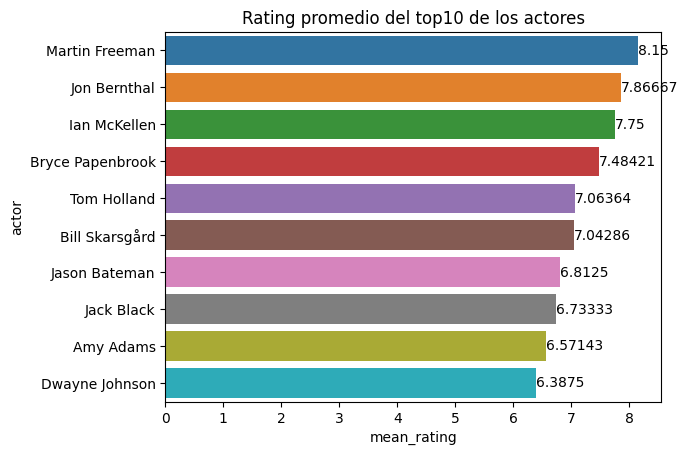

In [300]:
fig,ax = plt.subplots()
sns.barplot(ax=ax,data=topbest, y = 'actor', x = 'mean_rating')
ax.bar_label(ax.containers[0])
plt.title('Rating promedio del top10 de los actores')
plt.show()

Las películas de los 10 actores más populares del top10 tienen notas promedio que van de 6.38 a 8.15. Curiosamente Dwayne Johnson que tiene 3 películas o series en el top 250 tiene el rating promedio más bajo. Por otro lado, Martin Freeman tiene una nota promedio de 8.15 y también tiene 3 películas o series en el top 250. Podemos suponer que la popularidad de los actores no se mide sólo por la calidad de sus películas.

In [302]:
#Hacemos una funcion para calcular el rating promedio de las películas de un actor
def mean_poprank(actor):
    filtered = df[df['cast'].str.contains(actor)]
    return filtered['popular_rank'].mean()

In [303]:
topbest.loc[:,'mean_rank'] = topbest['actor'].map(mean_poprank)

In [304]:
topbest = topbest.sort_values('mean_rank')

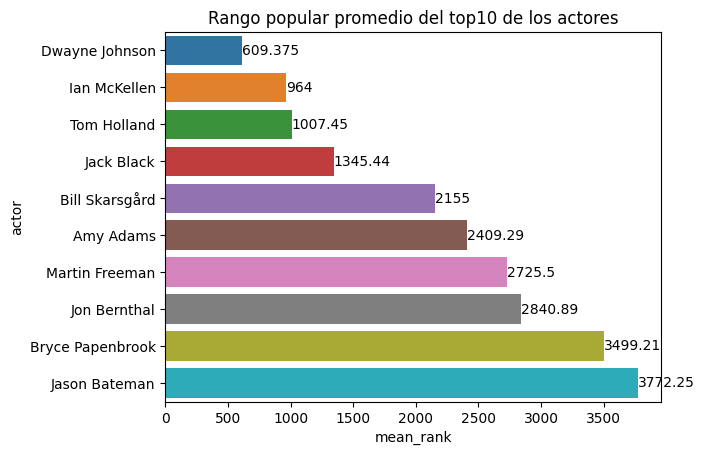

In [305]:
fig,ax = plt.subplots()
sns.barplot(ax=ax,data=topbest, y = 'actor', x = 'mean_rank')
ax.bar_label(ax.containers[0])
plt.title('Rango popular promedio del top10 de los actores')
plt.show()

Al comparar los rangos populares promedio de las películas de cada actor podemos constatar que Dwayne Johnson tiene el mejor rango popular promedio que los otros.

# Conclusión del análisis exploratorio de datos
Basado en el presente análisis, podemos concluir que Netflix es una plataforma de streaming que se especializa en las series y películas. Sin embargo, sus series parecen ser de mejor calidad que sus películas y tener más popularidad entre los usuarios. Al ser una plataforma estadounidense, las mayor parte de los contenidos de la plataforma fueron producidos en el mismo país. Los dos otros productores importantes para la plataforma son el Reino Unido y Japón. Al mismo tiempo, el país y año de producción no parecen tener mucho efecto en la popularidad de los contenidos. Así la distribución de años y de países de producción en los 1000 contenidos más populares es parecida a la distribución en el set de datos entero. Los que es más importante para el éxito de un contenido en Netflix es su calidad y género. El género más popular en la plataforma es el drama y más precisamente el drama criminal. En cuanto a la calidad de los contenidos, las series y las películas del top 250 tienen una nota de IMDB superior a la nota promedio del set de datos. Además, las notas de las series son generalmente superiores a las de la películas. Finalmente varios actores desempeñaron más de un papel principal en el top 250, lo que podría significar que ciertos actores contribuyen a la popularidad de sus películas. Uno de tales actores es Dwayne Johnson. A pesar de que la nota promedio de sus películas es relativamente baja, tienen un rango popular promedio elevado. Por lo tanto, la popularidad de un actor no tiene necesariamente que ver con la calidad de las producciones que protagoniza. Una posible estrategia de desarollo para Netflix consistiría en mejorar la calidad de sus películas, enfocándose particularmente en las películas de crimén y las comedias, para atraer tanto a los aficionados de las series como de las películas.

# Construcción de modelo de agrupación

A continuación vamos construir un modelo de agrupación para dividir los datos en grupos y análizar las carácteristicas de los grupos con el mejor rango de popularidad.

## Preprocesamiento de los datos

Primero tendremos que preprocesar nuestros datos para seleccionar las variables más relevantes para nuestro proyecto y eliminar las variables textuales. También vamos a estandandardizar las variables continuas para evitar sesgos en el modelo.

### Variables
Las variables que vamos a incluir en nuestro análisis son las siguientes:

* startYear
* type
* rating
* genres

La variable "genres" ya la codificamos con el método OneHotEncoding. Las otras variables que tendremos que codificar son "tipo" y "orign_country".
También crearemos dos nuevas variables "total_rt" o duración total y "periodo".
En cuanto a la variable "popular_rank", no será usada en la creación del modelo pero la incluiremos de nuevo en el momento de
analizar los clusters construidos.

In [116]:
# En cuanto a la variable "certificate", no podrá ser usada para la construcción del modelo porque conteniene muchos valores
# "Unknown"
np.unique(df.certificate, return_counts = True)

(array(['(Banned)', '12', '12+', '13', '13+', '15', '15+', '16', '16+',
        '18', '18+', '7', '7+', 'A', 'All', 'G', 'NC-17', 'Not Rated',
        'PG', 'PG-13', 'R', 'U', 'UA', 'Unknown', 'Unrated'], dtype=object),
 array([   3,    3,   12,  255,   21,   11,   18,  416,   74,  613,   57,
         106,    6,  147,   19,    7,    1,   16,   53,   92,  226,  104,
         111, 3794,    2], dtype=int64))

In [117]:
# A la columna "genres" ya aplicamos el método de One Hot Encoding en el trabajo anterior. Por lo tanto vamos
# a importar el csv con los datos codificados y concatenarlo con el dataframe principal

ohe_genres = pd.read_csv("encoded_final.csv")
# verificamos que los dos dataframes tienen la misma cantidad de filas.
len(ohe_genres) == len(df)

True

In [118]:
ohe_genres = ohe_genres.drop('Unnamed: 0', axis = 1)
df = pd.concat([df, ohe_genres], axis = 1)
df.drop('genres', axis = 1, inplace = True)

In [119]:
# Vamos a codificar la columna 'Type'. Asignaremos el valor 0 a todas las películas, el valor 1 a todas las series y mini series
# y el valor 2 a los contenidos de otros tipos
index_series = df[df['type'].isin(['tvSeries', 'tvMiniSeries'])].index
df.loc[index_series, 'type'] = 1
index_movie = df[df['type'].isin(['movie'])].index
df.loc[index_movie, 'type'] = 0
index_other = df[~df['type'].isin([0,1])].index
df.loc[index_other, 'type'] = 2
df.type = pd.to_numeric(df.type)
# Verificamos los valores que obtuvimos
np.unique(df.type)

array([0, 1, 2], dtype=int64)

## País de origen y idioma
Dos otras variables que nos pueden servir en el análisis son el país de origen y el idioma. Son dos variables correlacionados porque en la mayoría de los casos, cada país hace películas en su propia idioma.

In [120]:
duplicates = df[['orign_country', 'language']].duplicated().sum()
total_values = len(df)
print(f"En {duplicates} de los {total_values} casos, tenemos combinaciones de país e idioma repitidas.")

En 5905 de los 6167 casos, tenemos combinaciones de país e idioma repitidas.


In [121]:
print(f"cantidad de países: {len(df['orign_country'].unique())}\
      \ncantidad de idiomas: {len(df['language'].unique())}")

cantidad de países: 81      
cantidad de idiomas: 71


Como tenemos más países que idiomas en el set de datos, nos vamos a quedar con la variable países porque contiene más información.

In [122]:
#Usamos el LabelEncoder para codificar la columna "orign_country"

le = LabelEncoder()
country = le.fit_transform(df['orign_country'])
df.orign_country = country
df.head()

,Unnamed: 0,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,...,Short,Sport,War,Musical,Talk-Show,Game-Show,Unknown,Western,News,Film-Noir
0,0,tt4052886,Lucifer,1.0,15,2016.0,NaN,93.0,42.0,1,...,0,0,0,0,0,0,0,0,0,0
1,1,tt0993840,Army of the Dead,2.0,18,2021.0,2021.0,1.0,148.0,0,...,0,0,0,0,0,0,0,0,0,0
2,2,tt7255502,The Kominsky Method,3.0,18,2018.0,2021.0,22.0,30.0,1,...,0,0,0,0,0,0,0,0,0,0
3,3,tt0108778,Friends,4.0,13+,1994.0,2004.0,235.0,22.0,1,...,0,0,0,0,0,0,0,0,0,0
4,4,tt9251798,Ragnarok,5.0,18,2020.0,NaN,12.0,45.0,1,...,0,0,0,0,0,0,0,0,0,0


### Duración total

En la columna runtime tenemos la duración de cada contenido. Sin embargo, para las series tenemos la duración por episodio y no la duración total. Vamos a calcular la duración total multiplicando la columna "runtime" por la columna "episodes".

In [123]:
df['total_rt'] = df.runtime * df.episodes
df['total_rt'].head()

0    3906.0
1     148.0
2     660.0
3    5170.0
4     540.0
Name: total_rt, dtype: float64

La duración total de las series es naturalmente superior a la de las películas que tienen solo 1 episodio.

### Periodo
El año de estreno es una característica importante para saber si un contenido es nuevo o viejo. Sin embargo, al seleccionar una película para ver, los espectadores a menudos no se van a fijar en el año exacto pero más bien al periodo al que pertenece. Por lo tanto, vamos a generar una nueva variable periodo a partir de "startYear". Cada contenido será asignado a uno de los cuatro periodos que son los siguientes:
* antes de 2000 o películas viejas
* 2000-2010
* 2010-2020
* después de 2020 o películas nuevas

In [124]:
# Para realizar la clasificación creamos una función. El periodo más antiguo recibió el número 0 y luego los números van 
# creciendo a medida que nos acercamos del presente
def movie_period(year):
    if year >= 2020:
        return 3
    elif 2010 <= year < 2020:
        return 2
    elif 2000 <= year < 2010:
        return 1
    else:
        return 0

In [125]:
# aplicamos la función a la columna startYear de nuestra base de datos
df['period'] = df.startYear.map(movie_period)

Ahora guardamos la base de datos preprocesada y borramos las columnas que no usaremos para crear el modelo

In [130]:
df.to_csv('preprocessed.csv', index = False)
df.columns

Index(['Unnamed: 0', 'imdb_id', 'title', 'popular_rank', 'certificate',
       'startYear', 'endYear', 'episodes', 'runtime', 'type', 'orign_country',
       'language', 'plot', 'summary', 'rating', 'numVotes', 'cast',
       'image_url', 'Drama', 'Comedy', 'Action', 'Documentary', 'Crime',
       'Animation', 'Adventure', 'Romance', 'Thriller', 'Mystery', 'Horror',
       'Family', 'Fantasy', 'Biography', 'History', 'Sci-Fi', 'Reality-TV',
       'Music', 'Short', 'Sport', 'War', 'Musical', 'Talk-Show', 'Game-Show',
       'Unknown', 'Western', 'News', 'Film-Noir', 'total_rt', 'period'],
      dtype='object')

In [137]:
clustering_df = df.drop(['Unnamed: 0', "imdb_id", 'title', 'popular_rank', 'certificate', 'endYear', 'episodes', 'runtime',\
        'language', 'plot', 'summary', 'numVotes', 'cast', 'image_url'], axis = 1)

In [138]:
# verificamos que no tenemos valores nulos
clustering_df.isnull().sum()

startYear        0
type             0
orign_country    0
rating           0
Drama            0
Comedy           0
Action           0
Documentary      0
Crime            0
Animation        0
Adventure        0
Romance          0
Thriller         0
Mystery          0
Horror           0
Family           0
Fantasy          0
Biography        0
History          0
Sci-Fi           0
Reality-TV       0
Music            0
Short            0
Sport            0
War              0
Musical          0
Talk-Show        0
Game-Show        0
Unknown          0
Western          0
News             0
Film-Noir        0
total_rt         0
period           0
dtype: int64

### Estandardización

Ahora usaremos el método de Standard Scalar para estandardizar las variables continuas: "rating" y "total_rt".

In [142]:
sc = StandardScaler()
clustering_df[['rating', 'total_rt']] = sc.fit_transform(df[['rating', 'total_rt']])

In [143]:
# guardamos el dataframe que será usado para la agrupación
clustering_df.to_csv('clustering.csv', index = False)

## Selección de un algortimo de agrupación

Ahora que nuestro conjunto de datos fue preprocesado, vamos a seleccionar un algoritmo de agrupación que usaremos para nuestro modelo. Para hacerlo, vamos a escribir una función que ejecutará varios modelos y agregará sus métricas a una tabla.
Serán usados los algoritmos siguientes:

* Agglomerative Clustering
* OPTICS
* HDBSCAN
* KMeans
* Birch

El algoritmo de Agglomerative Clustering determinará el número de grupos para construir básandose en el umbral de distancia que fijaremos. Los algoritmos OPTICS y HDBSCAN generarán una cantidad de grupos ilimitada y clasificarán algunos de los registros como ruido. Finalmente KMeans y Birch van a generar un número de grupos determinados que vamos y buscar usándo el metodo de codo.

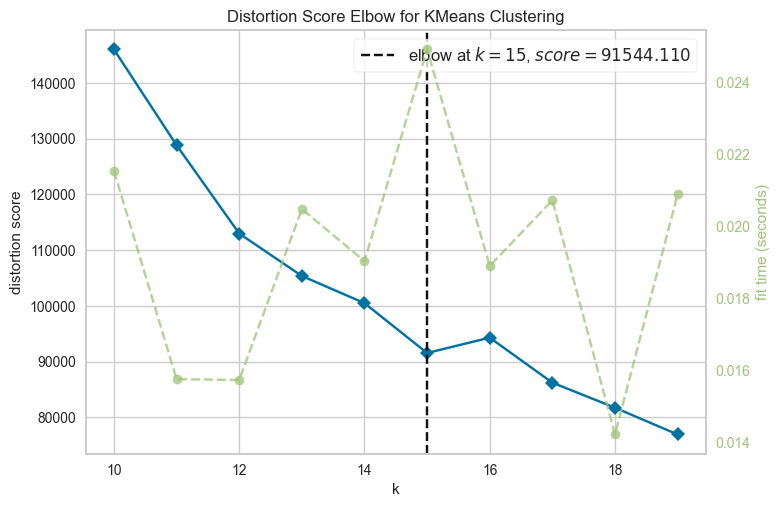

<AxesSubplot: title={'center': 'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [151]:
# Usamos la función KElbowVisualizer de la librería yellowbrick para dibujar un gráfico de codo.
model = KMeans()
visualizer = KElbowVisualizer(model, k = (10, 20))
visualizer.fit(clustering_df)
visualizer.show()

El gráfico no sugiere que el número de grupos óptimo es de 15 pero el resultado puede variar levemente si ejecutamos el código varias veces.

In [157]:
# Construimos una función que toma el dataframe y los algoritmos como parámetros y devuelve una tabla de métricas finales.
def get_metrics_table(df, *algorithms):
    # creamos un dataframe con el número de columnas y líneas que necesitamos y lo llenamos con ceros.
    results_frame = pd.DataFrame(0, index = np.arange(len(algorithms)), columns = ['Silhouette', 'Davies-Bouldin',\
                                                                                'Calinski-Harabasz','median_size', 'size_std',\
                                                                                'largest cluster / noise', 'n_clusters'])
    index = []
    line = 0
    
    # Buscamos los algoritmos de la lista y construimos un modelo con cada uno.
    for alg in algorithms:
        model = alg
        model.fit(df)
        labels = model.labels_
        #extraemos el nombre del modelo
        bracket_position = str(alg).rfind('(')
        index.append(str(alg)[0:bracket_position])
        # averiguamos si el modelo clasifico algunos datos como ruido (grupo -1) o no y agregamos los resultados a la tabla
        if -1 in labels:
            without_noise = df[labels != -1]
            labels_wn = labels[labels != -1]
            results_frame.iloc[line, 0] = silhouette_score(without_noise, labels_wn)
            results_frame.iloc[line, 1] = davies_bouldin_score(without_noise, labels_wn)
            results_frame.iloc[line, 2] = calinski_harabasz_score(without_noise, labels_wn)
            results_frame.iloc[line, 3] = np.median(np.unique(labels_wn, return_counts = True)[1])
            results_frame.iloc[line, 4] = np.std(np.unique(labels_wn, return_counts = True)[1])
            results_frame.iloc[line, 5] = len(labels[labels == -1])
            results_frame.iloc[line, 6] = len(np.unique(labels_wn))
        else:
            results_frame.iloc[line, 0] = silhouette_score(df, labels)
            results_frame.iloc[line, 1] = davies_bouldin_score(df, labels)
            results_frame.iloc[line, 2] = calinski_harabasz_score(df, labels)
            results_frame.iloc[line, 3] = np.median(np.unique(labels, return_counts = True)[1])
            results_frame.iloc[line, 4] = np.std(np.unique(labels, return_counts = True)[1])
            results_frame.iloc[line, 5] = np.unique(labels, return_counts = True)[1].max()
            results_frame.iloc[line, 6] = len(np.unique(labels))
        line +=1
    # creamos un index que consiste en los nombres de los modelos que creamos    
    results_frame.index = np.array(index) 
    # devolvemos la tabla obtenido
    return(results_frame)

In [153]:
# Definimos los algoritmos que usaremos
algorithms = [AgglomerativeClustering(distance_threshold = 100, linkage = 'ward', n_clusters = None),
             HDBSCAN(max_cluster_size = 250),
             OPTICS(min_samples = 5),
             KMeans(n_clusters = 15, init = "k-means++"),
             Birch(n_clusters = 15)]

In [158]:
# ejecutamos la función y asignamos la tabla devuelta a una variable. Luego mostramos la tabla
results = get_metrics_table(clustering_df, *algorithms)
results

,Silhouette,Davies-Bouldin,Calinski-Harabasz,median_size,size_std,largest cluster / noise,n_clusters
AgglomerativeClustering,0.379629,0.827888,19833.465545,297,397.914346,1321,17
HDBSCAN,0.302374,0.922213,4532.665706,9,32.594940,3884,118
OPTICS,0.467651,0.772198,4278.193785,7,5.197511,4918,146
KMeans,0.415580,0.780357,21833.135284,336,440.450507,1693,15
Birch,0.375625,0.789972,20710.588950,338,413.520151,1392,15


In [159]:
# Exportamos la tabla de resultados como imagen
results_styles = results.style.background_gradient()
dataframe_image.export(results_styles, 'results.png')

Basándonos en las métricas, elegiremos KMeans como nuestro algoritmo. Primero, formó un número de grupos menos grande que los algoritmos de OPTICS y HDBSCAN lo que nos permite destacar tendencias más generales en los datos. Segundo, obtuvo mejores métricas que los modelos de agrupación jerárquica, es decir Birch y AgglomerativeClustering. 

In [160]:
# Creamos un modelo de KMeans para agrupar los datos
km = KMeans(n_clusters = 15)
km.fit(clustering_df)
km.labels_

array([2, 2, 2, ..., 4, 2, 2])

El algoritmo ha asignado cada registro a un grupo. Sin embargo, como los resultados pueden variar de una ejecución a otra, a continuación usaremos las etiquetas que habíamos obtenido antes.

In [161]:
labels = pd.read_csv('final_labels.csv', usecols=[1])
labels = labels.rename(columns = {'0': 'cluster'})
labels.head()

,cluster
0,8
1,1
2,1
3,6
4,13


In [162]:
# Creamos una función para calcular las métricas del modelo final y agregarlos a una tabla
def final_model_results(df, labels):
    result_df = pd.DataFrame(index = ['Silhouette score', 'Davies-Bouldin score', 'Calinski-Harabasz score',\
                                         'Tamaño de grupo mediano', 'Tamaño de grupo más grande'],
            columns = {'Resultado': np.zeros([1,5])})
    result_df.iloc[0,0] = silhouette_score(df, labels)
    result_df.iloc[1,0] = davies_bouldin_score(df, labels)
    result_df.iloc[2,0] = calinski_harabasz_score(df, labels)
    result_df.iloc[3,0] = np.median(np.unique(labels, return_counts = True)[1])
    result_df.iloc[4,0] = np.unique(labels, return_counts = True)[1].max()
    return result_df

In [165]:
final_metrics = final_model_results(clustering_df, labels.cluster)
final_metrics

,Resultado
Silhouette score,0.42218
Davies-Bouldin score,0.781554
Calinski-Harabasz score,22027.153799
Tamaño de grupo mediano,305.0
Tamaño de grupo más grande,1693


In [166]:
# Presentamos los tamaños de los clusters en una tabla
km_counts = np.unique(km.labels_, return_counts = True)
pd.DataFrame(np.reshape(km_counts[1], (1, 15)), columns = km_counts[0], index = ['Tamaño'])

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14
Tamaño,221,418,1991,425,406,33,613,109,844,31,364,73,329,34,276


## Análisis de los clusters
Ahora vamos a construir gráficas para análizar los grupos obtenidos

In [167]:
# importamos el conjunto de datos inicial que contiene datos sobre el rango popular de los contenidos
url = 'https://drive.google.com/file/d/1xR2HHhVI1ofOZGlD7hYBuhWP9JNl5ubn/view?usp=drive_link'
path = 'https://drive.google.com/uc?export=download&id='+url.split('/')[-2]
init_df = pd.read_csv(path)
init_df.head()

,Unnamed: 0,imdb_id,title,popular_rank,certificate,startYear,endYear,episodes,runtime,type,orign_country,language,plot,summary,rating,numVotes,genres,cast,image_url
0,0,tt4052886,Lucifer,1.0,15,2016.0,NaN,93.0,42.0,tvSeries,United States,English,Lucifer Morningstar has decided he's had enoug...,"Lucifer Morningstar, bored from his sulking li...",8.1,250884.0,"Crime,Drama,Fantasy","['Tom Ellis', 'Lauren German', 'Lesley-Ann Bra...",https://m.media-amazon.com/images/M/MV5BNzY1Yj...
1,1,tt0993840,Army of the Dead,2.0,18,2021.0,2021.0,1.0,148.0,movie,United States,English,"Following a zombie outbreak in Las Vegas, a gr...","With the abandoned, walled city of Las Vegas o...",5.8,110780.0,"Action,Crime,Horror","['Dave Bautista', 'Ella Purnell', 'Ana de la R...",https://m.media-amazon.com/images/M/MV5BNGY0Nz...
2,2,tt7255502,The Kominsky Method,3.0,18,2018.0,2021.0,22.0,30.0,tvSeries,United States,English,"An aging actor, who long ago enjoyed a brush w...",Michael Douglas plays an actor who made it big...,8.2,28795.0,"Comedy,Drama","['Michael Douglas', 'Sarah Baker', 'Graham Rog...",https://m.media-amazon.com/images/M/MV5BMzA0YT...
3,3,tt0108778,Friends,4.0,13+,1994.0,2004.0,235.0,22.0,tvSeries,United States,English,Follows the personal and professional lives of...,"Ross Geller, Rachel Green, Monica Geller, Joey...",8.9,861843.0,"Comedy,Romance","['Jennifer Aniston', 'Courteney Cox', 'Lisa Ku...",https://m.media-amazon.com/images/M/MV5BNDVkYj...
4,4,tt9251798,Ragnarok,5.0,18,2020.0,NaN,12.0,45.0,tvSeries,Norway,Norwegian,A small Norwegian town experiencing warm winte...,In the small fictional town of Edda coming of ...,7.5,26606.0,"Action,Drama,Fantasy","['David Stakston', 'Jonas Strand Gravli', 'Her...",https://m.media-amazon.com/images/M/MV5BODM3NT...


In [168]:
# Asignamos nuestras etiquetas a una columna
init_df['cluster'] = labels.cluster

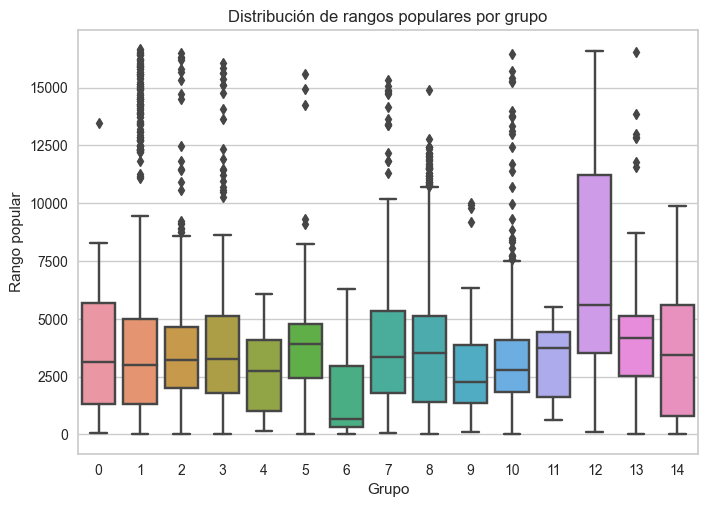

In [169]:
# Creamos una gráfica de Caja para visualizar la distrubición de los rangos populares entre los grupos
fig, ax = plt.subplots()
sns.boxplot(init_df, x = 'cluster', y = 'popular_rank', ax = ax)
ax.set_title("Distribución de rangos populares por grupo")
ax.set_xlabel('Grupo')
ax.set_ylabel('Rango popular')
plt.show()

Podemos notar que los grupos con el rango popular promedio más alto son los grupos número 6, 9 y 4. Vamos a analizar cada uno de estos grupos por separado. Nos enfocaremos sobre todo en el género, el país de producción y el tipo de los contenidos.

In [174]:
# Para análizar los géneros en cada grupo, primero creamos un dataframe con solo los generos y las etiquetas de grupo
df_genres = pd.concat([labels, clustering_df.iloc[:,4:32]], axis = 1)
# Luego creamos una función que devuelva los 10 géneros más frecuentes en un cluster
def get_top10_genres(cluster):
    df_cluster = df_genres[df_genres['cluster'] == cluster]
    counts = df_cluster.iloc[:,1:].apply(sum, axis = 0)
    return counts.head(10).sort_values(ascending = False).reset_index().rename(columns = {'index': 'genre', 0: 'count'})
# Finalmente usamos la precedente función para generar una gráfica de barras y guardarla en png.
def get_barplot(cluster):
    count_df = get_top10_genres(cluster)
    fig, ax = plt.subplots()
    sns.barplot(count_df, x = 'count', y = 'genre', ax=ax)
    ax.set_title(f'Top 10 géneros en el grupo {cluster}')
    ax.set(xlabel = None, ylabel = None)
    ax.xaxis.set_tick_params(labelbottom=False)
    for i in range(len(count_df)):
        ax.text(count_df.iloc[i, 1], i, str(count_df.iloc[i,1]))
    plt.savefig(f'generos_grupo{cluster}.png')

In [183]:
# Creamos una función similar que extrae los tipos presentes en un grupo, calcula su frecuencia y devuelve los datos en 
# una tabla
def get_tipos(cluster):
    df_type = init_df[init_df['cluster'] == cluster]
    types = df_type['type'].value_counts().sort_values(ascending = False)
    types = types.reset_index()
    types.rename(columns = {'index': 'Type', 'type': 'Conteo'}, inplace = True)
    types.index = types.Type
    types.drop('Type', axis = 1, inplace = True)
    types.index.name = None
    print(types)
    types = types.style.set_caption(f'Tipos de contenido en el grupo {cluster}').set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'black'),
            ('font-size', '18px'),
            ('text-align', 'center'),
            ("font-weight", 'bold')
        ]
    }]).background_gradient()
    dataframe_image.export(types, f'types_{cluster}.png')

In [184]:
# Finalmente creamos una función que muestra los cinco países de producción más importantes en un grupa, crea una tabla con
# los datos y guarda la tabla como imagen
def get_top5_countries(cluster):
    df_country = init_df[init_df['cluster'] == cluster]
    top_c = df_country['orign_country'].value_counts().sort_values(ascending=False).head(5)
    top_c = top_c.reset_index()
    top_c.rename(columns = {'index': 'Country', 'orign_country': 'Conteo'}, inplace = True)
    top_c.index = top_c.Country
    top_c.drop('Country', axis = 1, inplace = True)
    top_c.index.name = None
    print(top_c)
    top_c = top_c.style.set_caption(f'Top 5 países en el grupo {cluster}' if len(top_c) == 5 else\
                                   f'Los {len(top_c)} países del grupo {cluster}').\
    set_table_styles([{
        'selector': 'caption',
        'props': [
            ('color', 'black'),
            ('font-size', '18px'),
            ('text-align', 'center'),
            ("font-weight", 'bold')
        ]
    }]).background_gradient()
    dataframe_image.export(top_c, f'top_countries_{cluster}.png')


los tipos en el grupo 4: 
              Conteo
movie             48
tvSeries           2
short              2
tvSpecial          2
tvMiniSeries       1

los países en el grupo 4: 
                Conteo
United States       41
United Kingdom       7
Sweden               7

los tipos en el grupo 6: 
              Conteo
movie             37
tvSeries          27
tvSpecial          7
video              5
tvMovie            2
tvMiniSeries       1
tvEpisode          1

los países en el grupo 6: 
                Conteo
United States       65
United Kingdom      13
Sweden               2

los tipos en el grupo 9: 
              Conteo
tvSeries          55
movie             51
tvMiniSeries       8
tvEpisode          5
video              2
tvSpecial          2
short              1

los países en el grupo 9: 
             Conteo
Japan            83
India            16
Ireland           5
Netherlands       4
New Zealand       3


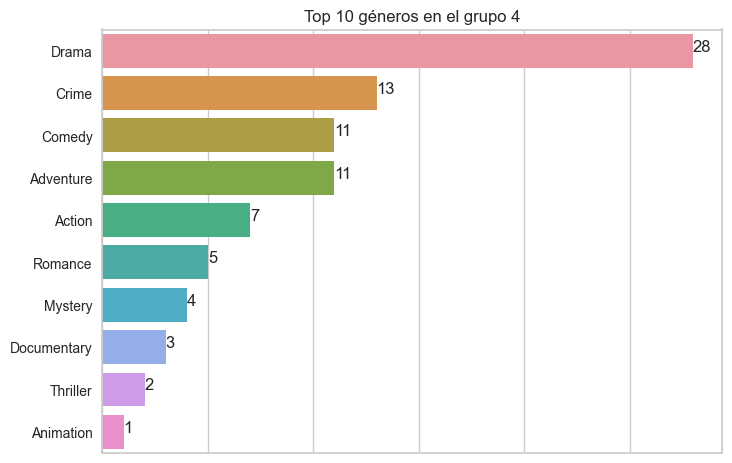

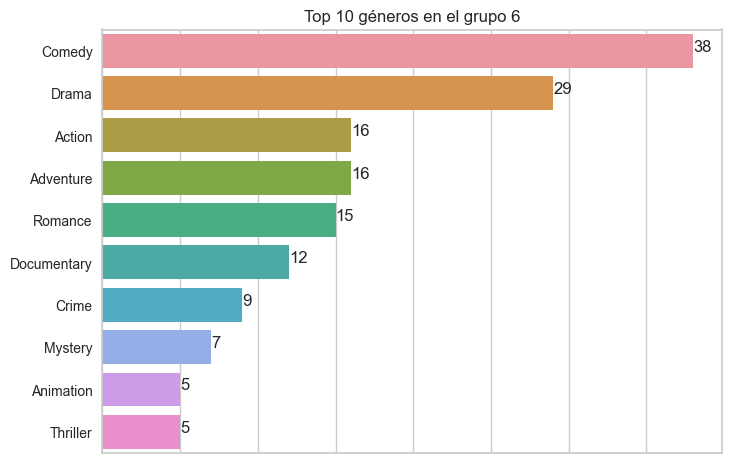

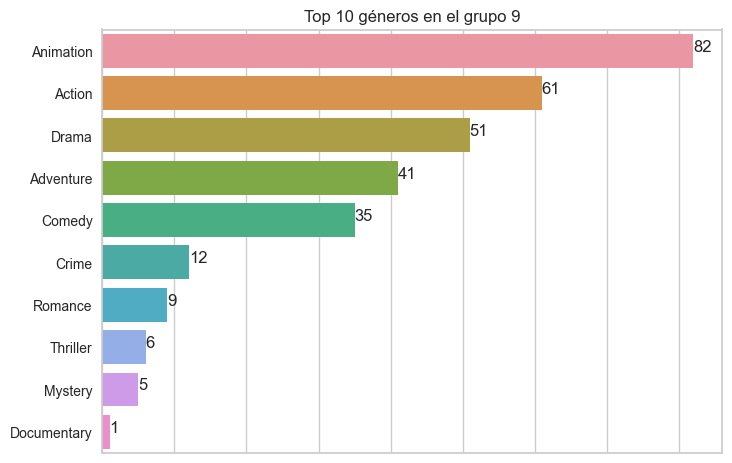

In [187]:
# Hacemos un bucle para correr las funciones para cada grupos que nos interesa
for i in [4,6,9]:
    get_barplot(i)
    print(f'\nlos tipos en el grupo {i}: ')
    get_tipos(i)
    print(f'\nlos países en el grupo {i}: ')
    get_top5_countries(i)

### Análisis de los resultados
Al mirar los resultados para el grupo 6 podemos notar que el grupo contiene tanto películas como series. Sin embargo, son contenido producidos sobre todo en dos países: Reino Unido y Estados Unidos. También se destacan ciertos géneros en el gráfico de géneros. Podemos constatar una predominancia de comedia y dramas. Otros géneros importante son acción y aventura. Esto parece confirmar nuestras conclusiones del análisis de los datos sobre los géneros más populares.

En cuanto al grupo 4 este grupo tiene un tipo de contenido sobresaliente que son películas de género drama producidos en los Estados Unidos. El segundo género más representado es crimen, por lo tanto podemos suponer que se trata de dramas criminales.
Por otro lado, cabe señalar que también son presentes comedias y aventuras, mientras los dos otros países incluidos son el Reino Unido y Suecia que también podemos ver en el precedente grupo.

Finalmente en el grupo 9 también se destaca un tipo de contenido en particular que son películas y series de animación japonesas, es decir animés, que pueden ser de acción, de aventura o dramas.
Es una nueva categoría de contenido importante que no hemos identificado en la fase del análisis exploratorio de los datos.


## Sugerencias para los usuarios

Finalmente vamos a crear una función para sugerir contenidos al usuario. Primero modificaremos el dataframe que usamos para la agrupación dejando sólo las columnas relativas al tipo, idioma, rankeo, géneros, duración total y periodo de cada contenido.

In [190]:
suggestions = pd.read_csv('preprocessed.csv.')
suggestions.drop('Unnamed: 0', axis = 1, inplace = True)
suggestions.columns

Index(['imdb_id', 'title', 'popular_rank', 'certificate', 'startYear',
       'endYear', 'episodes', 'runtime', 'type', 'orign_country', 'language',
       'plot', 'summary', 'rating', 'numVotes', 'cast', 'image_url', 'Drama',
       'Comedy', 'Action', 'Documentary', 'Crime', 'Animation', 'Adventure',
       'Romance', 'Thriller', 'Mystery', 'Horror', 'Family', 'Fantasy',
       'Biography', 'History', 'Sci-Fi', 'Reality-TV', 'Music', 'Short',
       'Sport', 'War', 'Musical', 'Talk-Show', 'Game-Show', 'Unknown',
       'Western', 'News', 'Film-Noir', 'total_rt', 'period'],
      dtype='object')

In [193]:
suggestions = suggestions[['type', 'language', 'rating', 'Drama', 'Comedy', 'Action',
       'Documentary', 'Crime', 'Animation', 'Adventure', 'Romance', 'Thriller',
       'Mystery', 'Horror', 'Family', 'Fantasy', 'Biography', 'History',
       'Sci-Fi', 'Reality-TV', 'Music', 'Short', 'Sport', 'War', 'Musical',
       'Talk-Show', 'Game-Show', 'Unknown', 'Western', 'News', 'Film-Noir',
       'total_rt', 'period']]
suggestions.head()

,type,language,rating,Drama,Comedy,Action,Documentary,Crime,Animation,Adventure,...,War,Musical,Talk-Show,Game-Show,Unknown,Western,News,Film-Noir,total_rt,period
0,1,English,8.1,1,0,0,0,1,0,0,...,0,0,0,0,0,0,0,0,3906.0,2
1,0,English,5.8,0,0,1,0,1,0,0,...,0,0,0,0,0,0,0,0,148.0,3
2,1,English,8.2,1,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,660.0,2
3,1,English,8.9,0,1,0,0,0,0,0,...,0,0,0,0,0,0,0,0,5170.0,0
4,1,Norwegian,7.5,1,0,1,0,0,0,0,...,0,0,0,0,0,0,0,0,540.0,3


In [195]:
# Codificamos la columna "idioma" y estandardizamos las columnas "rating" y "total_rt"
le = LabelEncoder()
suggestions.language = le.fit_transform(suggestions.language)
sc = StandardScaler()
suggestions[['rating', 'total_rt']] = sc.fit_transform(suggestions[['rating', 'total_rt']])

In [203]:
# tenemos sólo valores númericos
suggestions.dtypes

type             int64
language         int32
rating         float64
Drama            int64
Comedy           int64
Action           int64
Documentary      int64
Crime            int64
Animation        int64
Adventure        int64
Romance          int64
Thriller         int64
Mystery          int64
Horror           int64
Family           int64
Fantasy          int64
Biography        int64
History          int64
Sci-Fi           int64
Reality-TV       int64
Music            int64
Short            int64
Sport            int64
War              int64
Musical          int64
Talk-Show        int64
Game-Show        int64
Unknown          int64
Western          int64
News             int64
Film-Noir        int64
total_rt       float64
period           int64
dtype: object

In [204]:
# Entrenamos un modelo de Nearest Neighbors que va a buscar los 6 contenidos más parecidos
nn = NearestNeighbors(n_neighbors = 6, algorithm = 'ball_tree')
nn.fit(suggestions)
# guardamos las distancias e indices generados por el modelo
distances, indices = nn.kneighbors(suggestions)

In [205]:
# Escribimos una función para buscar una película en el dataframe y extraer las sugerencias de los indices
def neigh_suggestions():
    # Pedimos al usuario entrar el nombre de su película
    movie = input('Qué película te ha gustado? ')
    # Convertimos todos los títulos a minúsculas
    lower_title = init_df.copy()
    lower_title.title = lower_title.title.str.lower()
    # Buscamos la primera coincidencia en el dataframe
    line = lower_title[lower_title.title.str.match(f'.*{movie.lower()}.*')].index[0]
    # Extraemos el título con mayúsculas del dataframe original
    title = init_df.iloc[line, 2]
    print(f'\nSi te gustó "{title}", te recomendamos: \n')
    # buscamos el indice de cada sugerencia en los indices y extraemos las informaciones relevantes del dataframe inicial
    for line in indices[line]:
        if init_df.iloc[line, 2] != title:
            print(init_df.iloc[line, 1], '-', init_df.iloc[line, 2], '-', init_df.iloc[line, 9], '-', init_df.iloc[line, 10],\
                  '-', init_df.iloc[line, 16])

In [206]:
# Vamos a testear la función
neigh_suggestions()

Qué película te ha gustado? Lord of the

Si te gustó "The Lord of the Rings: The Fellowship of the Ring", te recomendamos: 

tt0167261 - The Lord of the Rings: The Two Towers - movie - New Zealand - Action,Adventure,Drama
tt0167260 - The Lord of the Rings: The Return of the King - movie - New Zealand - Action,Adventure,Drama
tt1663202 - The Revenant - movie - United States - Action,Adventure,Drama
tt0416449 - 300 - movie - United States - Action,Drama
tt0266697 - Kill Bill: Vol. 1 - movie - United States - Action,Crime,Drama


In [207]:
neigh_suggestions()

Qué película te ha gustado? kill bill

Si te gustó "Kill Bill: Vol. 1", te recomendamos: 

tt0399295 - Lord of War - movie - France - Action,Crime,Drama
tt0023427 - Scarface - movie - United States - Action,Crime,Drama
tt0480025 - This Is England - movie - United Kingdom - Crime,Drama
tt3890160 - Baby Driver - movie - United Kingdom - Action,Crime,Drama
tt0416449 - 300 - movie - United States - Action,Drama


In [208]:
neigh_suggestions()

Qué película te ha gustado? Seutateueob

Si te gustó "Seutateueob", te recomendamos: 

tt12451520 - Saikojiman Gwaenchanha - tvSeries - South Korea - Comedy,Drama,Romance
tt12182904 - Once Again - tvSeries - South Korea - Comedy,Drama,Romance
tt12525622 - Was It Love - tvSeries - South Korea - Comedy,Drama,Romance
tt12401208 - Yashiknamnyeo - tvSeries - South Korea - Comedy,Drama,Romance
tt7278588 - Ibeon Saengeun Cheoeumira - tvSeries - South Korea - Comedy,Drama,Romance


### Rendimiento
El modelo logra hacer sugerencia relevantes. Selecciona contenidos del mismo tipo y género.
En algunos casos son contenidos del mismo país, como para la serie surcoreana porque solo este país produce contenidos en coreano para Netflix.
En otros casos fueron seleccionados contenidos de otros países pero en el mismo idioma y del mismo género, como en el caso del Señor de los anillos. Eso parece justificar el uso de la variable idioma para el entrenamiento del modelo.

# Conclusión y futuras líneas
El análisis del conjunto de datos y el desarrollo del modelo de agrupación nos permitieron identificar las categorías de contenido más prometedoras y crear una función para proponer sugerencias de contenido al usuario que selecciona películas y series relevante.
Sin embargo, el modelo puede ser mejorado aún de las siguientes maneras:

* Se podrían utilizar los datos textuales de la columna “plot”.
* Se podrían extraer datos más completos para otras variables como por ejemplo “certificate”, lo que requeriría el uso de la API de IMDB que no es de acceso libre.
* Se podría actualizar el conjunto de datos agregando contenidos más recentes de Netflix.
* Se podría seguir mejorando la función de sugerencias para, por ejemplo, proponer contenidos basándose en varias apreciaciones del usuario en vez de una sola.
* Se podría desarrollar un modelo para identificar contenidos prometedores en conjunto de datos más grandes que contendrían los datos sobre películas que no están en Netflix
